In [2]:
# importing required libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Sales Data

In [3]:
sales_data = pd.read_excel(r"C:\Users\jeeva\OneDrive\Desktop\infosys_internship\Sales Data.xlsx", sheet_name = 0) # sales data
dis_data = pd.read_excel(r"C:\Users\jeeva\OneDrive\Desktop\infosys_internship\Sales Data.xlsx", sheet_name = 1) # distribution data
ship_data = pd.read_excel(r"C:\Users\jeeva\OneDrive\Desktop\infosys_internship\Sales Data.xlsx", sheet_name = 2) # shipment data

In [4]:
# checking the datatype
type(sales_data)

pandas.core.frame.DataFrame

In [5]:
type(dis_data)

pandas.core.frame.DataFrame

In [6]:
type(ship_data)

pandas.core.frame.DataFrame

Displaying Raw Data

In [7]:
sales_data.head() # Sales Data

Unnamed: 0 Value ('000 HKD) Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0               Period            Brand         V1         V2         V3   
1  2011-07-01 00:00:00          28518.3    12706.5    12196.9     3614.4   
2  2011-08-01 00:00:00          31712.5    14190.5    13250.5     4271.6   
3  2011-09-01 00:00:00          28436.8    12422.5    11946.7     4067.6   
4  2011-10-01 00:00:00          29048.8    12652.5    12690.9     3705.5   

   Unnamed: 5 Volume (SU) Unnamed: 7 Unnamed: 8 Unnamed: 9  Unnamed: 10  \
0         NaN       Brand         V1         V2         V3          NaN   
1         NaN     85935.6    36127.4    40971.6     8835.6          NaN   
2         NaN     95135.2    40373.7    44402.1    10359.4          NaN   
3         NaN       85814    36034.5    40029.2     9750.3          NaN   
4         NaN     88047.7    36697.8    42431.3     8918.6          NaN   

  Avg Price per SU Unnamed: 12 Unnamed: 13 Unnamed: 14  Unnamed: 15  \
0            Brand          V1          V2          V3          NaN   
1       331.856646  351.713658  297.691572  409.072389          NaN   
2       333.341392  351.478809   298.42057  412.340483          NaN   
3       331.377165   344.73907  298.449632  417.176907          NaN   
4       329.921168  344.775436  299.092887  415.480008          NaN   

  Avg Price per USD Unnamed: 17 Unnamed: 18 Unnamed: 19  
0             Brand          V1          V2          V3  
1         43.141364   45.722776   38.699904   53.179411  
2         43.334381   45.692245   38.794674   53.604263  
3         43.079031   44.816079   38.798452   54.232998  
4         42.889752   44.820807   38.882075   54.012401

In [8]:
dis_data.head() # Distribution data

Unnamed: 0    WTD Unnamed: 2 Unnamed: 3 Unnamed: 4  Unnamed: 5  \
0               Period  Brand         V1         V2         V3         NaN   
1  2011-07-01 00:00:00    100        100         99         96         NaN   
2  2011-08-01 00:00:00    100         99         99         96         NaN   
3  2011-09-01 00:00:00    100         99         99         95         NaN   
4  2011-10-01 00:00:00     99         99         99         94         NaN   

    NUMD Unnamed: 7 Unnamed: 8 Unnamed: 9  
0  Brand         V1         V2         V3  
1     48         46         46         40  
2     48         46         46         40  
3     48         46         46         39  
4     48         46         46         38

In [9]:
ship_data.head() # Shipment Data

Unnamed: 0  Shipment SU  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0               Period        Brand          V1          V2          V3   
1  2011-07-01 00:00:00   111110.765  43869.0272  59022.5266   8219.2112   
2  2011-08-01 00:00:00    98568.474   48970.128  40447.5286   9150.8174   
3  2011-09-01 00:00:00  122461.0034  54010.9639  58820.3602   9629.6793   
4  2011-10-01 00:00:00  134933.0212  60733.5058  63417.0106  10782.5048   

   Unnamed: 5 Volume (SU) Unnamed: 7 Unnamed: 8 Unnamed: 9  
0         NaN       Brand         V1         V2         V3  
1         NaN     85935.6    36127.4    40971.6     8835.6  
2         NaN     95135.2    40373.7    44402.1    10359.4  
3         NaN       85814    36034.5    40029.2     9750.3  
4         NaN     88047.7    36697.8    42431.3     8918.6

Preparing Sales Data

In [10]:
# function to clean data

def clean_data(df, names):
    df.dropna(axis=1, how='all', inplace=True)

    df.columns = names
    
    df.drop(index=df.index[0], axis=0, inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    df['Period'] = pd.to_datetime(df['Period'], errors='coerce')
    df['Period'] = df['Period'].dt.date


Cleaning Sales Data

In [11]:
sales_data.columns # old columns of sales data 

Index(['Unnamed: 0', 'Value ('000 HKD)', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Volume (SU)', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Avg Price per SU', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Avg Price per USD',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [12]:
new_sales_col = ["Period","Brand_Sales_Value","V1_Sales_Value", "V2_Sales_Value", "V3_Sales_Value",
          "Brand_Volume","V1_Volume", "V2_Volume", "V3_Volume",
          "Brand_Avg_Price_per_SU","V1_Avg_Price_per_SU", "V2_Avg_Price_per_SU", "V3_Avg_Price_per_SU",
          "Brand_Avg_Price_per_USD","V1_Avg_Price_per_USD", "V2_Avg_Price_per_USD", "V3_Avg_Price_per_USD"]

clean_data(sales_data, new_sales_col)
sales_data.head() # Printing the cleaned sales data.

Period Brand_Sales_Value V1_Sales_Value V2_Sales_Value V3_Sales_Value  \
0  2011-07-01           28518.3        12706.5        12196.9         3614.4   
1  2011-08-01           31712.5        14190.5        13250.5         4271.6   
2  2011-09-01           28436.8        12422.5        11946.7         4067.6   
3  2011-10-01           29048.8        12652.5        12690.9         3705.5   
4  2011-11-01          30463.54       13737.66       12723.97         4001.9   

  Brand_Volume V1_Volume V2_Volume V3_Volume Brand_Avg_Price_per_SU  \
0      85935.6   36127.4   40971.6    8835.6             331.856646   
1      95135.2   40373.7   44402.1   10359.4             333.341392   
2        85814   36034.5   40029.2    9750.3             331.377165   
3      88047.7   36697.8   42431.3    8918.6             329.921168   
4     92028.93   39742.8     42395   9891.13             331.021343   

  V1_Avg_Price_per_SU V2_Avg_Price_per_SU V3_Avg_Price_per_SU  \
0          351.713658          297.691572          409.072389   
1          351.478809           298.42057          412.340483   
2           344.73907          298.449632          417.176907   
3          344.775436          299.092887          415.480008   
4           345.66412          300.129025          404.594824   

  Brand_Avg_Price_per_USD V1_Avg_Price_per_USD V2_Avg_Price_per_USD  \
0               43.141364            45.722776            38.699904   
1               43.334381            45.692245            38.794674   
2               43.079031            44.816079            38.798452   
3               42.889752            44.820807            38.882075   
4               43.032775            44.936336            39.016773   

  V3_Avg_Price_per_USD  
0            53.179411  
1            53.604263  
2            54.232998  
3            54.012401  
4            52.597327

Cleaning Distribution Data

In [13]:
dis_data.columns # old columns of distribution data

Index(['Unnamed: 0', 'WTD', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'NUMD', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [14]:
new_dis_col = ['Period', 'Brand_WTD', 'V1_WTD', 'V2_WTD', 'V3_WTD', 'Brand_NUMD', 'V1_NUMD', 'V2_NUMD', 'V3_NUMD']

clean_data(dis_data, new_dis_col)
dis_data.head() # Printing the cleaned distribution data.

Period Brand_WTD V1_WTD V2_WTD V3_WTD Brand_NUMD V1_NUMD V2_NUMD  \
0  2011-07-01       100    100     99     96         48      46      46   
1  2011-08-01       100     99     99     96         48      46      46   
2  2011-09-01       100     99     99     95         48      46      46   
3  2011-10-01        99     99     99     94         48      46      46   
4  2011-11-01       100    100     99     93         48      46      45   

  V3_NUMD  
0      40  
1      40  
2      39  
3      38  
4      39

Cleaning Shipment Data

In [15]:
ship_data.columns

Index(['Unnamed: 0', 'Shipment SU', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Volume (SU)', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [16]:
ship_data.drop(['Volume (SU)', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis = 1, inplace = True) # droping common columns
ship_data.head()

Unnamed: 0  Shipment SU  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0               Period        Brand          V1          V2          V3   
1  2011-07-01 00:00:00   111110.765  43869.0272  59022.5266   8219.2112   
2  2011-08-01 00:00:00    98568.474   48970.128  40447.5286   9150.8174   
3  2011-09-01 00:00:00  122461.0034  54010.9639  58820.3602   9629.6793   
4  2011-10-01 00:00:00  134933.0212  60733.5058  63417.0106  10782.5048   

   Unnamed: 5  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [17]:
new_ship_col = ['Period', 'Brand_Shipment', 'V1_Shipment', 'V2_Shipment', 'V3_Shipment']

clean_data(ship_data, new_ship_col)
ship_data.head() # Printing the cleaned shipment data.

Period Brand_Shipment V1_Shipment V2_Shipment V3_Shipment
0  2011-07-01     111110.765  43869.0272  59022.5266   8219.2112
1  2011-08-01      98568.474   48970.128  40447.5286   9150.8174
2  2011-09-01    122461.0034  54010.9639  58820.3602   9629.6793
3  2011-10-01    134933.0212  60733.5058  63417.0106  10782.5048
4  2011-11-01    122066.2618  52525.5475  60432.8513    9107.863

Merging Data Frames

In [18]:
final_data = sales_data.merge(dis_data, on='Period', how='left') # mergeing sales data with distribution data
final_sales_data =  final_data.merge(ship_data, on='Period', how='left') # merging final data with shipment data

In [19]:
final_sales_data.shape # shape of the final data

(41, 29)

Displaying Final Sales Data

In [584]:
final_sales_data.head()

Period Brand_Sales_Value V1_Sales_Value V2_Sales_Value V3_Sales_Value  \
0  2011-07-01           28518.3        12706.5        12196.9         3614.4   
1  2011-08-01           31712.5        14190.5        13250.5         4271.6   
2  2011-09-01           28436.8        12422.5        11946.7         4067.6   
3  2011-10-01           29048.8        12652.5        12690.9         3705.5   
4  2011-11-01          30463.54       13737.66       12723.97         4001.9   

  Brand_Volume V1_Volume V2_Volume V3_Volume Brand_Avg_Price_per_SU  ...  \
0      85935.6   36127.4   40971.6    8835.6             331.856646  ...   
1      95135.2   40373.7   44402.1   10359.4             333.341392  ...   
2        85814   36034.5   40029.2    9750.3             331.377165  ...   
3      88047.7   36697.8   42431.3    8918.6             329.921168  ...   
4     92028.93   39742.8     42395   9891.13             331.021343  ...   

  V2_WTD V3_WTD Brand_NUMD V1_NUMD V2_NUMD V3_NUMD Brand_Shipment V1_Shipment  \
0     99     96         48      46      46      40     111110.765  43869.0272   
1     99     96         48      46      46      40      98568.474   48970.128   
2     99     95         48      46      46      39    122461.0034  54010.9639   
3     99     94         48      46      46      38    134933.0212  60733.5058   
4     99     93         48      46      45      39    122066.2618  52525.5475   

  V2_Shipment V3_Shipment  
0  59022.5266   8219.2112  
1  40447.5286   9150.8174  
2  58820.3602   9629.6793  
3  63417.0106  10782.5048  
4  60432.8513    9107.863  

[5 rows x 29 columns]

In [585]:
final_data.columns # displaying columns of final sales data

Index(['Period', 'Brand_Sales_Value', 'V1_Sales_Value', 'V2_Sales_Value',
       'V3_Sales_Value', 'Brand_Volume', 'V1_Volume', 'V2_Volume', 'V3_Volume',
       'Brand_Avg_Price_per_SU', 'V1_Avg_Price_per_SU', 'V2_Avg_Price_per_SU',
       'V3_Avg_Price_per_SU', 'Brand_Avg_Price_per_USD',
       'V1_Avg_Price_per_USD', 'V2_Avg_Price_per_USD', 'V3_Avg_Price_per_USD',
       'Brand_WTD', 'V1_WTD', 'V2_WTD', 'V3_WTD', 'Brand_NUMD', 'V1_NUMD',
       'V2_NUMD', 'V3_NUMD'],
      dtype='object')

Preprocessing Media Data

Declaring functions to clean media data

In [33]:
# function to take required data and replace 0 or - with nan
def pre_processing(media_data):
    media_data = pd.concat([media_data.iloc[0:3,:], media_data.iloc[21:57, :]], ignore_index=True)
    media_data = media_data.replace(['0', '-', 0], np.nan)
    return media_data

# function to print columns that are required
def needed_columns(media_data):
    print("Columns that are Needed\n")
    for i in media_data.columns:
        a = media_data[i].notna().mean()*100 
        if a > 60:
            print("%s \t %.2f%%"%(i,a)) 

# function to print all column headings
def all_col_info(media_data):
    one = [i for i in media_data.columns]
    two = [i for i in media_data.iloc[0]]
    three = [i for i in media_data.iloc[1]]
    four = [i for i in media_data.iloc[2]]
    for i in range(len(one)):
        print(one[i]," ",two[i]," ",three[i]," ",four[i])

# function to rename the needed column and drop unwanted columns
def change_drop_col(media_data, new_names):
    media_data.rename(columns = new_names , inplace=True)
    
    del_col = [i for i in media_data.columns if media_data[i].notna().mean()*100 < 60]
    media_data.drop(columns = del_col, inplace = True)

    media_data.drop(index=[media_data.index[0], media_data.index[1], media_data.index[2]], axis=0, inplace=True)
    media_data.reset_index(drop=True, inplace=True)

    media_data['Period'] = pd.to_datetime(media_data['Period'], errors='coerce')
    media_data['Period'] = media_data['Period'].dt.date


def change_date(df):
    df['Period'] = df['Period'].apply(lambda x: x.replace(day=1))



Preprocessing Brand Data

In [34]:
# loading brand data 
brand_data = pd.read_excel(r"C:\Users\jeeva\OneDrive\Desktop\infosys_internship\Media_Data.xlsx", sheet_name = 'Brand') 

Displaying Raw Brand Data

In [35]:
brand_data.head()

Unnamed: 0 TV including ISP (GRPs) - F30-39    Unnamed: 2  \
0                  NaN          TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                              GRP           GRP   
2       Responsibility                              AOR           AOR   
3  2010-01-01 00:00:00                              NaN           NaN   
4  2010-02-02 00:00:00                              NaN           NaN   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                NaN          NaN           NaN           NaN           NaN   
4                NaN          NaN           NaN           NaN           NaN   

     Unnamed: 8    Unnamed: 9  ...              Trial Sampling  \
0  25 Seconder   30 Seconder   ...  Pls add all Trial Elements   
1           GRP           GRP  ...                         NaN   
2           AOR           AOR  ...                         P&G   
3           NaN           NaN  ...                         NaN   
4           NaN           NaN  ...                         NaN   

                        Promotion Unnamed: 211 Unnamed: 212 Unnamed: 213  \
0  Pls add all Promotion Elements          NaN          NaN          NaN   
1                             NaN          NaN          NaN          NaN   
2                             P&G          NaN          NaN          NaN   
3                             NaN          NaN          NaN          NaN   
4                             NaN          NaN          NaN          NaN   

  Unnamed: 214 Unnamed: 215 Unnamed: 216 Unnamed: 217 Unnamed: 218  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 219 columns]

Taking care of 0 or - values and trunkating of unwanted rows

In [36]:
brand_data = pre_processing(brand_data)
brand_data.head() 

C:\Users\jeeva\AppData\Local\Temp\ipykernel_4080\2994757215.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  media_data = media_data.replace(['0', '-', 0], np.nan)


Unnamed: 0 TV including ISP (GRPs) - F30-39    Unnamed: 2  \
0                  NaN          TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                              GRP           GRP   
2       Responsibility                              AOR           AOR   
3  2011-07-31 00:00:00                              NaN           NaN   
4  2011-08-01 00:00:00                              NaN           NaN   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                NaN          NaN           NaN           NaN           NaN   
4                NaN          NaN           NaN           NaN           NaN   

     Unnamed: 8    Unnamed: 9  ...              Trial Sampling  \
0  25 Seconder   30 Seconder   ...  Pls add all Trial Elements   
1           GRP           GRP  ...                         NaN   
2           AOR           AOR  ...                         P&G   
3           NaN           NaN  ...                         NaN   
4           NaN           NaN  ...                         NaN   

                        Promotion Unnamed: 211 Unnamed: 212 Unnamed: 213  \
0  Pls add all Promotion Elements          NaN          NaN          NaN   
1                             NaN          NaN          NaN          NaN   
2                             P&G          NaN          NaN          NaN   
3                             NaN          NaN          NaN          NaN   
4                             NaN          NaN          NaN          NaN   

  Unnamed: 214 Unnamed: 215 Unnamed: 216 Unnamed: 217 Unnamed: 218  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 219 columns]

Retaining Columns with ≥ 60% Data Completeness

In [37]:
# printing the columns that are having highest value percentage( > 60 )
needed_columns(brand_data)

Columns that are Needed

Unnamed: 0 	 97.44%
Unnamed: 60 	 100.00%
Unnamed: 61 	 97.44%
Unnamed: 69 	 100.00%
Unnamed: 117 	 97.44%
Unnamed: 118 	 97.44%
Birth Rate 	 84.62%
Unnamed: 185 	 69.23%
CRM_Pampers Baby Club 	 100.00%


In [49]:
# displaying all columns information 
all_col_info(v1_data)

Unnamed: 0   nan   Unit   Responsibility
TV (GRPs) - F30-39   TOTAL GRPs - (ISP + TV)   GRP   AOR
Unnamed: 2   ISP TV Total   GRP   AOR
Unnamed: 3   ISP Digital Total   GRP   AOR
Unnamed: 4   5 Seconder    GRP   AOR
Unnamed: 5   10 Seconder    GRP   AOR
Unnamed: 6   15 Seconder    GRP   AOR
Unnamed: 7   20 Seconder    GRP   AOR
Unnamed: 8   25 Seconder    GRP   AOR
Unnamed: 9   30 Seconder    GRP   AOR
Unnamed: 10   35 Seconder    GRP   AOR
Unnamed: 11   TV Co-op    GRP   AOR
TV ISP Ivideo Impression   ISP Digital Total   No of impressions   AOR
Unnamed: 13   5 Seconder    No of impressions   AOR
Unnamed: 14   10 Seconder    No of impressions   AOR
Unnamed: 15   15 Seconder    No of impressions   AOR
Unnamed: 16   20 Seconder    No of impressions   AOR
Unnamed: 17   25 Seconder    No of impressions   AOR
Unnamed: 18   30 Seconder    No of impressions   AOR
Unnamed: 19   35 Seconder    No of impressions   AOR
TV ISP Ivideo Click    ISP Digital Total   No of Clicks   AOR
Unnamed: 21   5 

In [38]:
# using all column information renaming the needed columns

new_names_needed_col = {
'Unnamed: 0' : 'Period',
'Unnamed: 60' : 'brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Impressions',
'Unnamed: 61' : 'brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Clicks',
'Unnamed: 69' : 'brand_Search_Spends_SEM_Yahoo_Always_on_USM',
'Unnamed: 117' : 'brand_Social_Ad_Facebook_No_of_Likes',
'Unnamed: 118' : 'brand_Social_Ad_Facebook_PTAT',
    
'Birth Rate' : 'brand_Birth_Rate_No_of_Births_ppl_CPA',
'Unnamed: 185' : 'brand_Youtube_Brand_Channel_Side_by_Side_Video_No_of_Views_P&G_Digital_Agency',
'CRM_Pampers Baby Club' : 'brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G'
}

In [39]:
# renaming the needed column and droping unwanted column
change_drop_col(brand_data, new_names_needed_col)

In [40]:
change_date(brand_data) # setting date to 1st 

Displaying Final Brand Data

In [41]:
brand_data.head()

Period brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Impressions  \
0  2011-07-01                                           66442189              
1  2011-08-01                                           74218274              
2  2011-09-01                                           62093623              
3  2011-10-01                                           55363384              
4  2011-11-01                                           58743642              

  brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Clicks  \
0                                              24418         
1                                              23888         
2                                              22417         
3                                              18600         
4                                              21662         

  brand_Search_Spends_SEM_Yahoo_Always_on_USM  \
0                                    5.037171   
1                                    4.619848   
2                                    4.624386   
3                                    3.597169   
4                                    4.457098   

  brand_Social_Ad_Facebook_No_of_Likes brand_Social_Ad_Facebook_PTAT  \
0                                74109                    172.133333   
1                                75408                  76277.064516   
2                                77106                  77099.533333   
3                                77227                  77205.258065   
4                                77366                  77464.533333   

  brand_Birth_Rate_No_of_Births_ppl_CPA  \
0                                  8128   
1                                  8531   
2                                  8099   
3                                  8352   
4                                  7816   

  brand_Youtube_Brand_Channel_Side_by_Side_Video_No_of_Views_P&G_Digital_Agency  \
0                                                NaN                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

  brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G  
0                                          40.458478        
1                                          22.657005        
2                                          22.240559        
3                                          26.985212        
4                                          41.319185

In [42]:
brand_data.shape # shape of the brand data

(36, 9)

Preprocessing V1 Data

In [56]:
# loadin v1 data
v1_data = pd.read_excel(r"C:\Users\jeeva\OneDrive\Desktop\infosys_internship\Media_Data.xlsx", sheet_name = 'V1')

Displying Raw Data

In [57]:
v1_data.head()

Unnamed: 0       TV (GRPs) - F30-39    Unnamed: 2  \
0                  NaN  TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                      GRP           GRP   
2       Responsibility                      AOR           AOR   
3  2010-01-01 00:00:00                        0             0   
4  2010-02-02 00:00:00                        0             0   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                  0            0             0             0             0   
4                  0            0             0             0             0   

     Unnamed: 8    Unnamed: 9  ... Ecommerce Unnamed: 206      Unnamed: 207  \
0  25 Seconder   30 Seconder   ...   Offtake     Traffic   Conversion rate    
1           GRP           GRP  ...      NT$M          NaN               NaN   
2           AOR           AOR  ...       P&G          P&G               P&G   
3             0             0  ...       NaN          NaN               NaN   
4             0             0  ...       NaN          NaN               NaN   

  Ecommerce\n(Spends)              Trial Sampling  \
0             Offtake  Pls add all Trial Elements   
1                NT$M                         NaN   
2                 P&G                         P&G   
3                 NaN                         NaN   
4                 NaN                         NaN   

                        Promotion Unnamed: 211 Unnamed: 212 Unnamed: 213  \
0  Pls add all Promotion Elements          NaN          NaN          NaN   
1                             NaN          NaN          NaN          NaN   
2                             P&G          NaN          NaN          NaN   
3                             NaN          NaN          NaN          NaN   
4                             NaN          NaN          NaN          NaN   

  Unnamed: 214  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 215 columns]

In [58]:
# taking care of 0 or - values and trunkating of unwanted rows
v1_data = pre_processing(v1_data)
v1_data.head()

C:\Users\jeeva\AppData\Local\Temp\ipykernel_4080\2994757215.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  media_data = media_data.replace(['0', '-', 0], np.nan)


Unnamed: 0       TV (GRPs) - F30-39    Unnamed: 2  \
0                  NaN  TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                      GRP           GRP   
2       Responsibility                      AOR           AOR   
3  2011-07-31 00:00:00                      200           200   
4  2011-08-01 00:00:00                      100           100   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                NaN          NaN           NaN           200           NaN   
4                NaN          NaN           NaN           100           NaN   

     Unnamed: 8    Unnamed: 9  ... Ecommerce Unnamed: 206      Unnamed: 207  \
0  25 Seconder   30 Seconder   ...   Offtake     Traffic   Conversion rate    
1           GRP           GRP  ...      NT$M          NaN               NaN   
2           AOR           AOR  ...       P&G          P&G               P&G   
3           NaN           NaN  ...       NaN          NaN               NaN   
4           NaN           NaN  ...       NaN          NaN               NaN   

  Ecommerce\n(Spends)              Trial Sampling  \
0             Offtake  Pls add all Trial Elements   
1                NT$M                         NaN   
2                 P&G                         P&G   
3                 NaN                         NaN   
4                 NaN                         NaN   

                        Promotion Unnamed: 211 Unnamed: 212 Unnamed: 213  \
0  Pls add all Promotion Elements          NaN          NaN          NaN   
1                             NaN          NaN          NaN          NaN   
2                             P&G          NaN          NaN          NaN   
3                             NaN          NaN          NaN          NaN   
4                             NaN          NaN          NaN          NaN   

  Unnamed: 214  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 215 columns]

Retaining Columns with ≥ 60% Data Completeness

In [59]:
# printing the columns that are having highest value percentage( > 60 )
needed_columns(v1_data)

Columns that are Needed

Unnamed: 0 	 97.44%
TV (GRPs) - F30-39 	 92.31%
Unnamed: 2 	 92.31%
TV (Spends) 	 92.31%
Unnamed: 29 	 92.31%
iMedia_TOTAL (Impression & Click) 	 64.10%
Unnamed: 74 	 64.10%
Unnamed: 77 	 64.10%
Unnamed: 78 	 61.54%
Unnamed: 85 	 64.10%
Unnamed: 86 	 61.54%
iMedia_TOTAL (Spend) 	 64.10%
Unnamed: 97 	 64.10%
Unnamed: 101 	 64.10%


In [60]:
# displaying all columns information 
all_col_info(v1_data)

Unnamed: 0   nan   Unit   Responsibility
TV (GRPs) - F30-39   TOTAL GRPs - (ISP + TV)   GRP   AOR
Unnamed: 2   ISP TV Total   GRP   AOR
Unnamed: 3   ISP Digital Total   GRP   AOR
Unnamed: 4   5 Seconder    GRP   AOR
Unnamed: 5   10 Seconder    GRP   AOR
Unnamed: 6   15 Seconder    GRP   AOR
Unnamed: 7   20 Seconder    GRP   AOR
Unnamed: 8   25 Seconder    GRP   AOR
Unnamed: 9   30 Seconder    GRP   AOR
Unnamed: 10   35 Seconder    GRP   AOR
Unnamed: 11   TV Co-op    GRP   AOR
TV ISP Ivideo Impression   ISP Digital Total   No of impressions   AOR
Unnamed: 13   5 Seconder    No of impressions   AOR
Unnamed: 14   10 Seconder    No of impressions   AOR
Unnamed: 15   15 Seconder    No of impressions   AOR
Unnamed: 16   20 Seconder    No of impressions   AOR
Unnamed: 17   25 Seconder    No of impressions   AOR
Unnamed: 18   30 Seconder    No of impressions   AOR
Unnamed: 19   35 Seconder    No of impressions   AOR
TV ISP Ivideo Click    ISP Digital Total   No of Clicks   AOR
Unnamed: 21   5 

In [61]:
# using all column information renaming the needed columns
new_col_names = {
'Unnamed: 0':'Period',
'TV (GRPs) - F30-39':'v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR',
'Unnamed: 2':'v1_TV_GRP_F30_39_ISP_TV_Total_GRP_AOR',

    
'TV (Spends)':'v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR',
'Unnamed: 29':'v1_TV_Spends_ISP_TV_Spends_USM_AOR',

'Unnamed: 36':'v1_TV_Spends_30_Seconder_USM_AOR',
'iMedia_TOTAL (Impression & Click)':'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital',
    
'Unnamed: 74':'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital',
'Unnamed: 77':'v1_iMedia_TOTAL_Impression_Click_Parenting_Site_BBK_No_of_impressions_Digital', 

'Unnamed: 78':'v1_iMedia_TOTAL_Impression_Click_Parenting_Site_BBK_No_of_Clicks_Digital',

'Unnamed: 85':'v1_iMedia_by_Site_Impression_View_BBK_No_of_impressions_Digital',
'Unnamed: 86':'v1_iMedia_by_Site_Impression_View_BBK_No_of_Clicks_Digital',

'iMedia_TOTAL (Spend)':'v1_iMedia_TOTAL_Spend_iMedia Spends_USM_Digital_AOR',
'Unnamed: 97':'v1_iMedia_by_Site_Type_Spend_Parenting_Site_BBK_USM_Digital_AOR',
'Unnamed: 101':'v1_iMedia_by_Site_Spend_BBK_USM_Digital_AOR',
'Social Ad (performance , Spend)':'v1_Social_Ad_performance_Spend_Facebook_Ad_No_of_impressions_Digital',

} 

In [62]:
# renaming the needed column and droping unwanted column
change_drop_col(v1_data, new_col_names)

In [63]:
change_date(v1_data) # setting date to 1st

Displaying Final V1 Data

In [64]:
v1_data.head()

Period v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR  \
0  2011-07-01                                       200   
1  2011-08-01                                       100   
2  2011-09-01                                       100   
3  2011-10-01                                        91   
4  2011-11-01                                       686   

  v1_TV_GRP_F30_39_ISP_TV_Total_GRP_AOR  \
0                                   200   
1                                   100   
2                                   100   
3                                    91   
4                                   686   

  v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR v1_TV_Spends_ISP_TV_Spends_USM_AOR  \
0                                  9.17844                            9.17844   
1                                 3.856487                           3.856487   
2                                 5.321952                           5.321952   
3                                 3.856487                           3.856487   
4                                47.161647                          47.161647   

  v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital  \
0                                            2108173                  
1                                             507787                  
2                                            3076266                  
3                                            3250974                  
4                                             867203                  

  v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital  \
0                                               2549             
1                                                357             
2                                               2077             
3                                               2130             
4                                               1743             

  v1_iMedia_TOTAL_Impression_Click_Parenting_Site_BBK_No_of_impressions_Digital  \
0                                            2108173                              
1                                             507787                              
2                                            3076266                              
3                                            3250974                              
4                                             867203                              

  v1_iMedia_TOTAL_Impression_Click_Parenting_Site_BBK_No_of_Clicks_Digital  \
0                                               2549                         
1                                                357                         
2                                               2077                         
3                                               2130                         
4                                               1743                         

  v1_iMedia_by_Site_Impression_View_BBK_No_of_impressions_Digital  \
0                                            2108173                
1                                             507787                
2                                            3076266                
3                                            3250974                
4                                             867203                

  v1_iMedia_by_Site_Impression_View_BBK_No_of_Clicks_Digital  \
0                                               2549           
1                                                357           
2                                               2077           
3                                               2130           
4                                               1743           

  v1_iMedia_TOTAL_Spend_iMedia Spends_USM_Digital_AOR  \
0                                          14.182385    
1                                           0.703259    
2                                           7.032588    
3                                          10.314462    
4                            

In [65]:
v1_data.shape # shape of v1 data

(36, 14)

Preparing v2 Data

In [66]:
v2_data = pd.read_excel(r"C:\Users\jeeva\OneDrive\Desktop\infosys_internship\Media_Data.xlsx", sheet_name = 'V2') # loading v2 data

In [67]:
# taking care of 0 or - values and trunkating of unwanted rows
v2_data = pre_processing(v2_data)
v2_data.head()

C:\Users\jeeva\AppData\Local\Temp\ipykernel_4080\2994757215.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  media_data = media_data.replace(['0', '-', 0], np.nan)


Unnamed: 0       TV (GRPs) - F30-39    Unnamed: 2  \
0                  NaN  TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                      GRP           GRP   
2       Responsibility                      AOR           AOR   
3  2011-07-31 00:00:00                      434           434   
4  2011-08-01 00:00:00                      648           648   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                NaN          NaN           NaN           NaN           NaN   
4                NaN          NaN           NaN           NaN           NaN   

     Unnamed: 8    Unnamed: 9  ... Ecommerce Unnamed: 206      Unnamed: 207  \
0  25 Seconder   30 Seconder   ...   Offtake     Traffic   Conversion rate    
1           GRP           GRP  ...      NT$M          NaN               NaN   
2           AOR           AOR  ...       P&G          P&G               P&G   
3           NaN           434  ...       NaN          NaN               NaN   
4           NaN           648  ...       NaN          NaN               NaN   

  Ecommerce\n(Spends)              Trial Sampling  \
0             Offtake  Pls add all Trial Elements   
1                NT$M                         NaN   
2                 P&G                         P&G   
3                 NaN                         NaN   
4                 NaN                         NaN   

                        Promotion Unnamed: 211 Unnamed: 212 Unnamed: 213  \
0  Pls add all Promotion Elements          NaN          NaN          NaN   
1                             NaN          NaN          NaN          NaN   
2                             P&G          NaN          NaN          NaN   
3                             NaN          NaN          NaN          NaN   
4                             NaN          NaN          NaN          NaN   

  Unnamed: 214  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 215 columns]

Retaining Columns with ≥ 60% Data Completeness

In [68]:
# printing needed columns
needed_columns(v2_data)

Columns that are Needed

Unnamed: 0 	 97.44%


There is no any column in V2 data with more than 60 % of values

Preparing V3 Data

In [69]:
v3_data = pd.read_excel(r"C:\Users\jeeva\OneDrive\Desktop\infosys_internship\Media_Data.xlsx", sheet_name = 'V3') # loading v3 data

In [70]:
# taking care of 0 or - values and trunkating of unwanted rows
v3_data = pre_processing(v3_data)
v3_data.head()

C:\Users\jeeva\AppData\Local\Temp\ipykernel_4080\2994757215.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  media_data = media_data.replace(['0', '-', 0], np.nan)


Unnamed: 0       TV (GRPs) - F30-39    Unnamed: 2  \
0                  NaN  TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                      GRP           GRP   
2       Responsibility                      AOR           AOR   
3  2011-07-31 00:00:00                      400           400   
4  2011-08-01 00:00:00                      NaN           NaN   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                NaN          NaN           NaN           NaN           NaN   
4                NaN          NaN           NaN           NaN           NaN   

     Unnamed: 8    Unnamed: 9  ... Ecommerce Unnamed: 206      Unnamed: 207  \
0  25 Seconder   30 Seconder   ...   Offtake     Traffic   Conversion rate    
1           GRP           GRP  ...      NT$M          NaN               NaN   
2           AOR           AOR  ...       P&G          P&G               P&G   
3           NaN           400  ...       NaN          NaN               NaN   
4           NaN           NaN  ...       NaN          NaN               NaN   

  Ecommerce\n(Spends)              Trial Sampling  \
0             Offtake  Pls add all Trial Elements   
1                NT$M                         NaN   
2                 P&G                         P&G   
3                 NaN                         NaN   
4                 NaN                         NaN   

                        Promotion Unnamed: 211 Unnamed: 212 Unnamed: 213  \
0  Pls add all Promotion Elements          NaN          NaN          NaN   
1                             NaN          NaN          NaN          NaN   
2                             P&G          NaN          NaN          NaN   
3                             NaN          NaN          NaN          NaN   
4                             NaN          NaN          NaN          NaN   

  Unnamed: 214  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 215 columns]

Retaining Columns with ≥ 60% Data Completeness

In [71]:
# printing needed columns
needed_columns(v2_data)

Columns that are Needed

Unnamed: 0 	 97.44%


There is no any column in V3 data with more than 60 % of values

Merging The Data

In [72]:
final_media_data = brand_data.merge(v1_data, on='Period', how='left') # mergeing sales data with distribution data

Displaying Final Media Data

In [73]:
final_media_data.head()

Period brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Impressions  \
0  2011-07-01                                           66442189              
1  2011-08-01                                           74218274              
2  2011-09-01                                           62093623              
3  2011-10-01                                           55363384              
4  2011-11-01                                           58743642              

  brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Clicks  \
0                                              24418         
1                                              23888         
2                                              22417         
3                                              18600         
4                                              21662         

  brand_Search_Spends_SEM_Yahoo_Always_on_USM  \
0                                    5.037171   
1                                    4.619848   
2                                    4.624386   
3                                    3.597169   
4                                    4.457098   

  brand_Social_Ad_Facebook_No_of_Likes brand_Social_Ad_Facebook_PTAT  \
0                                74109                    172.133333   
1                                75408                  76277.064516   
2                                77106                  77099.533333   
3                                77227                  77205.258065   
4                                77366                  77464.533333   

  brand_Birth_Rate_No_of_Births_ppl_CPA  \
0                                  8128   
1                                  8531   
2                                  8099   
3                                  8352   
4                                  7816   

  brand_Youtube_Brand_Channel_Side_by_Side_Video_No_of_Views_P&G_Digital_Agency  \
0                                                NaN                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

  brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G  \
0                                          40.458478         
1                                          22.657005         
2                                          22.240559         
3                                          26.985212         
4                                          41.319185         

  v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR  ...  \
0                                       200  ...   
1                                       100  ...   
2                                       100  ...   
3                                        91  ...   
4                                       686  ...   

  v1_TV_Spends_ISP_TV_Spends_USM_AOR  \
0                            9.17844   
1                           3.856487   
2                           5.321952   
3                           3.856487   
4                          47.161647   

  v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital  \
0                                            2108173                  
1                                             507787                  
2                                            3076266                  
3                                            3250974                  
4                                             867203                  

  v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital  \
0                                               2549             
1                                                357             
2                                               2077             
3                                               2130   

In [74]:
final_media_data.shape

(36, 22)

Merging Sales and Media Data 

In [75]:
# Convert 'Period' to datetime in both DataFrames
final_sales_data['Period'] = pd.to_datetime(final_sales_data['Period'], errors='coerce')
final_media_data['Period'] = pd.to_datetime(final_media_data['Period'], errors='coerce')



sales_media_data = final_sales_data.merge(final_media_data, on='Period', how='left')

Displaying Final Data

In [76]:
sales_media_data.head()

Period Brand_Sales_Value V1_Sales_Value V2_Sales_Value V3_Sales_Value  \
0 2011-07-01           28518.3        12706.5        12196.9         3614.4   
1 2011-08-01           31712.5        14190.5        13250.5         4271.6   
2 2011-09-01           28436.8        12422.5        11946.7         4067.6   
3 2011-10-01           29048.8        12652.5        12690.9         3705.5   
4 2011-11-01          30463.54       13737.66       12723.97         4001.9   

  Brand_Volume V1_Volume V2_Volume V3_Volume Brand_Avg_Price_per_SU  ...  \
0      85935.6   36127.4   40971.6    8835.6             331.856646  ...   
1      95135.2   40373.7   44402.1   10359.4             333.341392  ...   
2        85814   36034.5   40029.2    9750.3             331.377165  ...   
3      88047.7   36697.8   42431.3    8918.6             329.921168  ...   
4     92028.93   39742.8     42395   9891.13             331.021343  ...   

  v1_TV_Spends_ISP_TV_Spends_USM_AOR  \
0                            9.17844   
1                           3.856487   
2                           5.321952   
3                           3.856487   
4                          47.161647   

  v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital  \
0                                            2108173                  
1                                             507787                  
2                                            3076266                  
3                                            3250974                  
4                                             867203                  

  v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital  \
0                                               2549             
1                                                357             
2                                               2077             
3                                               2130             
4                                               1743             

  v1_iMedia_TOTAL_Impression_Click_Parenting_Site_BBK_No_of_impressions_Digital  \
0                                            2108173                              
1                                             507787                              
2                                            3076266                              
3                                            3250974                              
4                                             867203                              

  v1_iMedia_TOTAL_Impression_Click_Parenting_Site_BBK_No_of_Clicks_Digital  \
0                                               2549                         
1                                                357                         
2                                               2077                         
3                                               2130                         
4                                               1743                         

  v1_iMedia_by_Site_Impression_View_BBK_No_of_impressions_Digital  \
0                                            2108173                
1                                             507787                
2                                            3076266                
3                                            3250974                
4                                             867203                

  v1_iMedia_by_Site_Impression_View_BBK_No_of_Clicks_Digital  \
0                                               2549           
1                                                357           
2                                               2077           
3                                               2130           
4                                               1743           

  v1_iMedia_TOTAL_Spend_iMedia Spends_USM_Digital_AOR  \
0                                          14.182385    
1                                           0.703259    
2                                           7.032588    
3            

In [77]:
sales_media_data.shape # shape of all merged data

(41, 50)

Checking for Missing Values

In [78]:
sales_media_data.isnull().sum() # checking for missing values

Period                                                                            0
Brand_Sales_Value                                                                 0
V1_Sales_Value                                                                    0
V2_Sales_Value                                                                    0
V3_Sales_Value                                                                    0
Brand_Volume                                                                      0
V1_Volume                                                                         0
V2_Volume                                                                         0
V3_Volume                                                                         0
Brand_Avg_Price_per_SU                                                            0
V1_Avg_Price_per_SU                                                               0
V2_Avg_Price_per_SU                                                         

Filling Missing Values

In [79]:
sales_media_data = sales_media_data.fillna(method='ffill') # using forward fill to fill forward missing values
sales_media_data = sales_media_data.fillna(method='bfill') # backward fill to fill backword values

C:\Users\jeeva\AppData\Local\Temp\ipykernel_4080\3712434216.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_media_data = sales_media_data.fillna(method='ffill') # using forward fill to fill forward missing values
C:\Users\jeeva\AppData\Local\Temp\ipykernel_4080\3712434216.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales_media_data = sales_media_data.fillna(method='ffill') # using forward fill to fill forward missing values
C:\Users\jeeva\AppData\Local\Temp\ipykernel_4080\3712434216.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_media_data = sales_media_data.fi

In [80]:
sales_media_data.isnull().sum() # After filling missing values veryfying...

Period                                                                           0
Brand_Sales_Value                                                                0
V1_Sales_Value                                                                   0
V2_Sales_Value                                                                   0
V3_Sales_Value                                                                   0
Brand_Volume                                                                     0
V1_Volume                                                                        0
V2_Volume                                                                        0
V3_Volume                                                                        0
Brand_Avg_Price_per_SU                                                           0
V1_Avg_Price_per_SU                                                              0
V2_Avg_Price_per_SU                                                              0
V3_A

In [81]:
# splitting the final data in to sales and media

sales = sales_media_data.iloc[:,0:29]
media = pd.concat([sales_media_data[['Period']], sales_media_data.iloc[:, 29:]], axis=1)


EXPLORATORY DATA ANALYSIS

For Sales Data :

Sales Data Distribution:


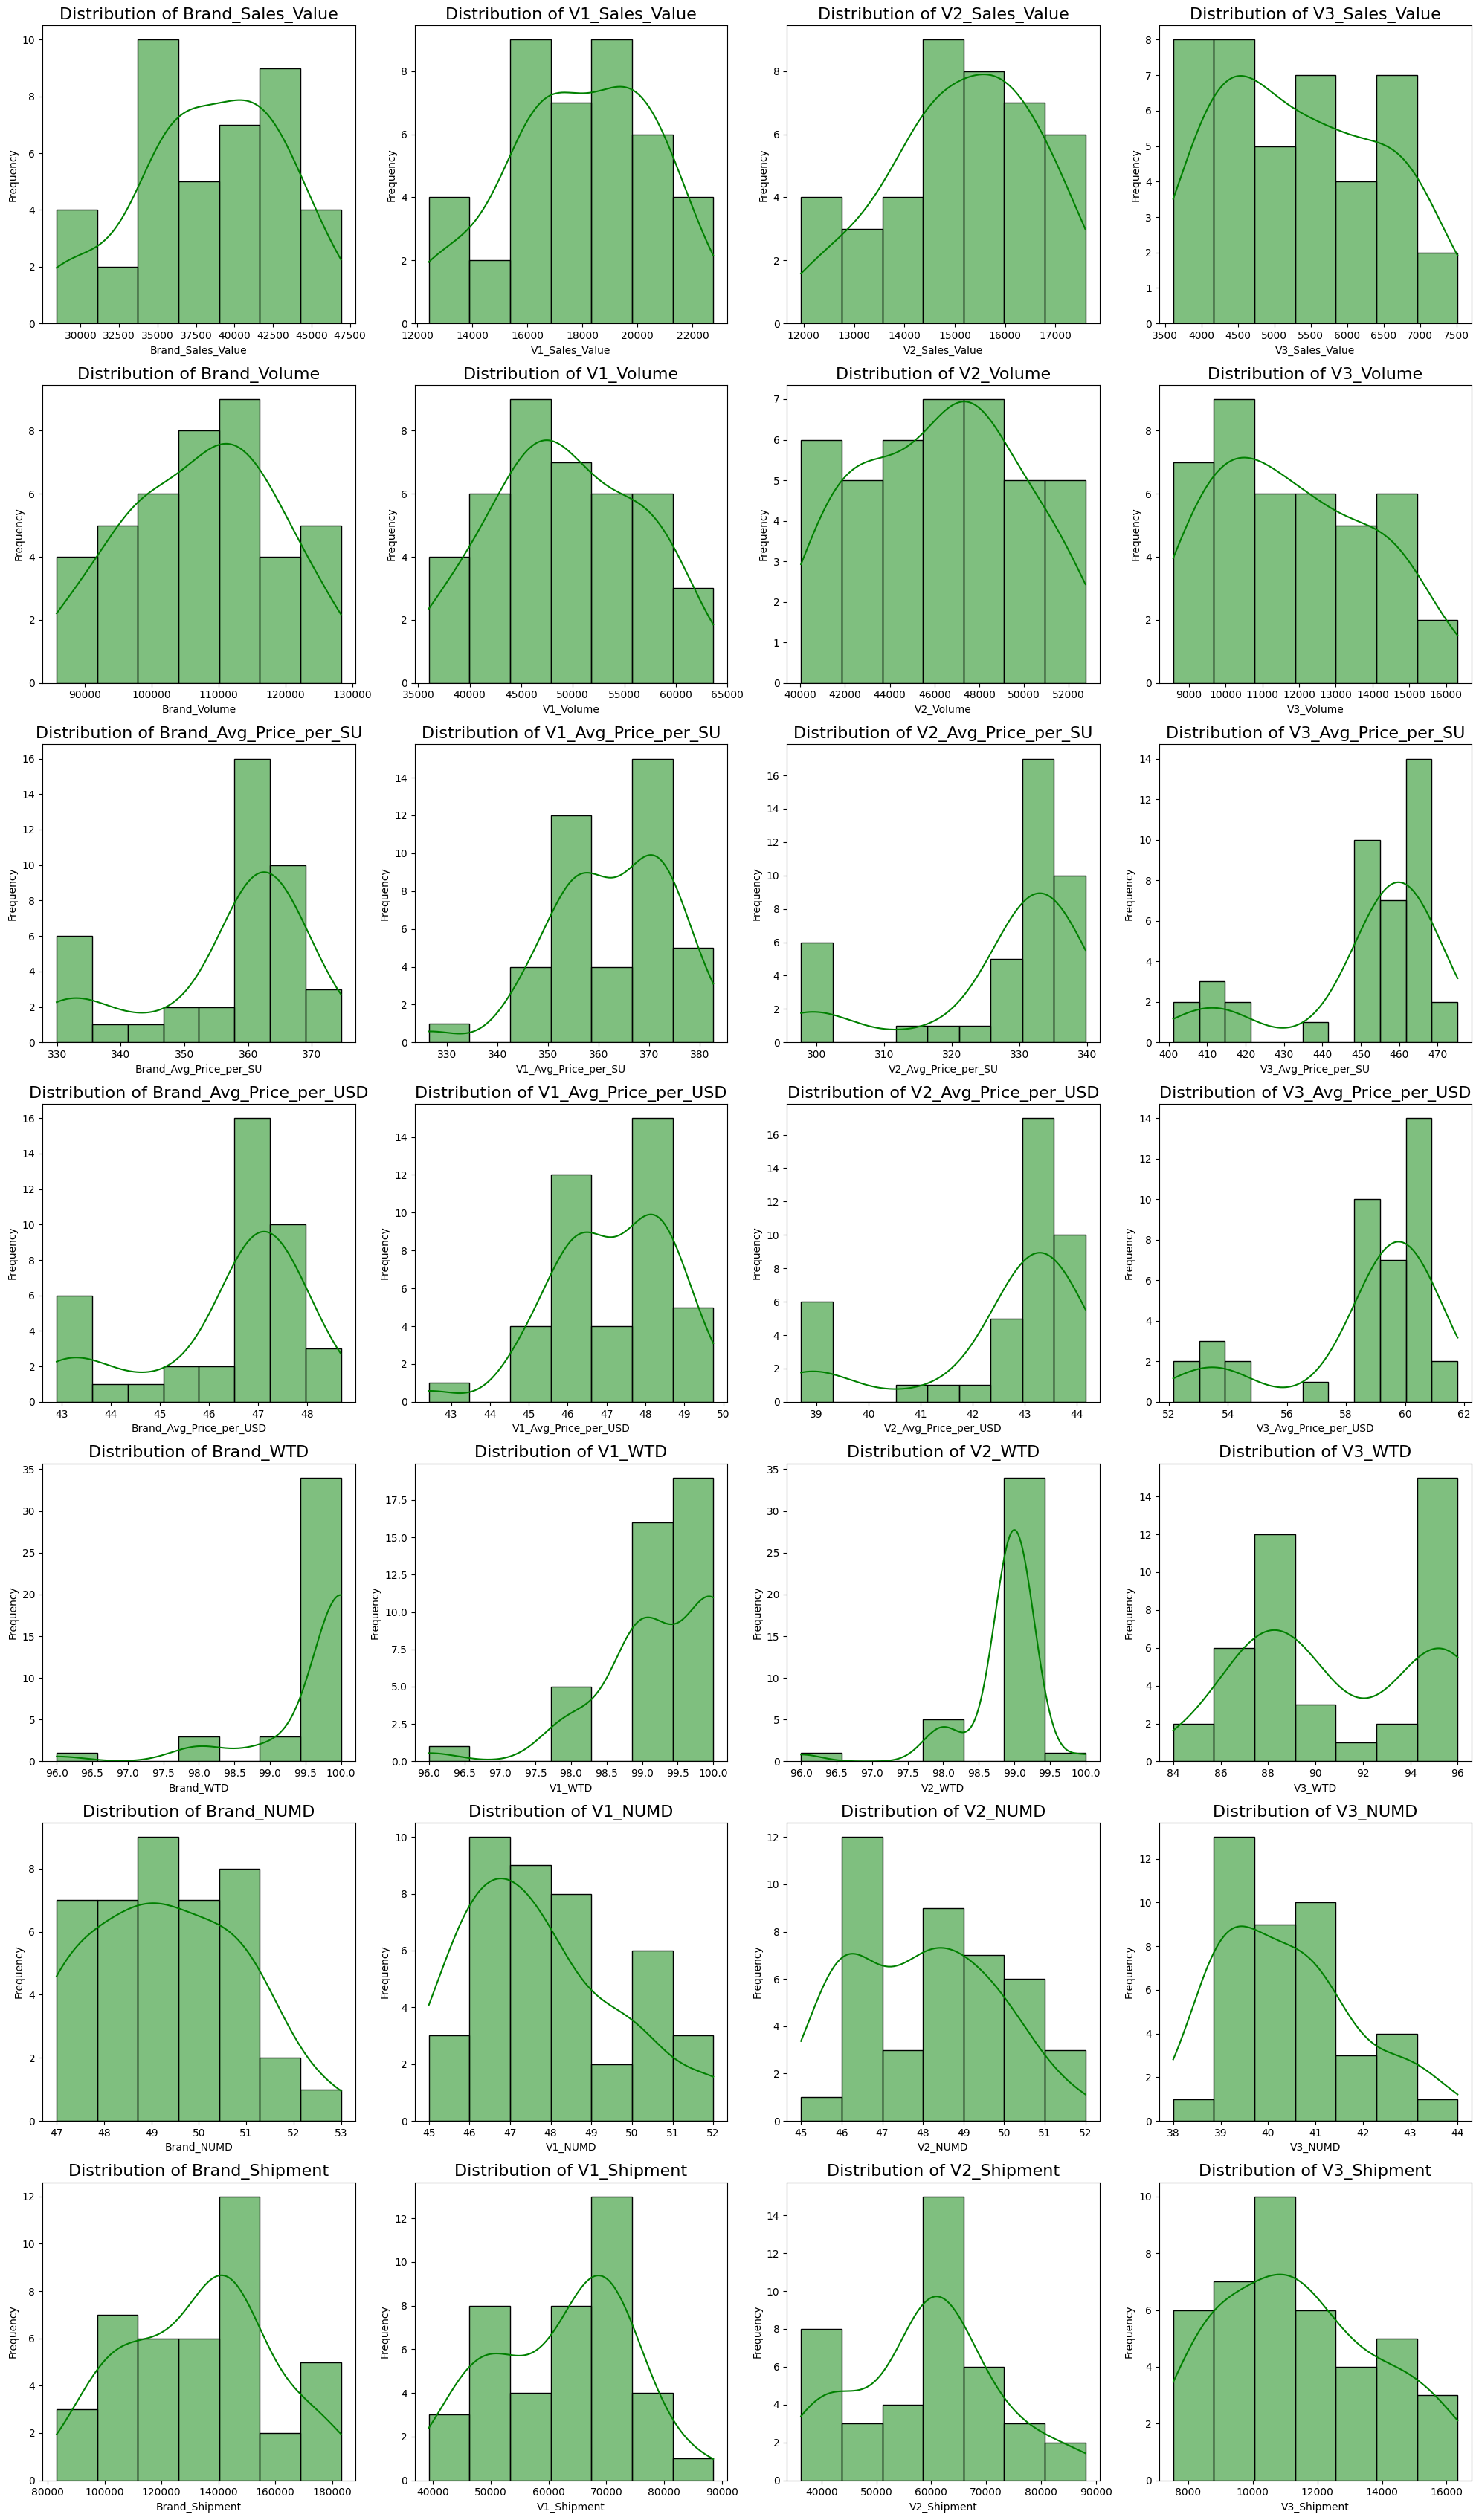

In [82]:
print("Sales Data Distribution:")

# Histograms for to represent sales Data
plt.figure(figsize=(20, 34))

i = 1  # Initialize subplot counter
for col in sales.columns:
    if col == 'Period':
        continue
    plt.subplot(7, 4, i)
    sns.histplot(sales[col], kde=True, color='green')
    plt.title(f'Distribution of {col}',fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    i += 1  # Increment only if a plot is created

plt.tight_layout()
plt.show()


In [83]:
# Changing the 'Period' column in the sales data which is in date format to 'Year'

sales['Period'] = sales['Period'].dt.year

In [84]:
# Calculate average for multiple columns (e.g., 'sales' and 'volume') for to plot pie chart for sales data
avg_sales_value_per_year = sales.groupby('Period')[['V1_Sales_Value', 'V2_Sales_Value', 'V3_Sales_Value']].mean()
avg_sales_volume_per_year = sales.groupby('Period')[['V1_Volume','V2_Volume','V3_Volume']].mean()
avg_sales_avgSU_per_year = sales.groupby('Period')[['V1_Avg_Price_per_SU','V2_Avg_Price_per_SU','V3_Avg_Price_per_SU']].mean()
avg_sales_avgUSD_per_year = sales.groupby('Period')[['V1_Avg_Price_per_USD','V2_Avg_Price_per_USD','V3_Avg_Price_per_USD']].mean()

In [85]:
avg_sales_value_per_year # Displaying avg sales for every years

V1_Sales_Value  V2_Sales_Value  V3_Sales_Value
Period                                                
2011      13684.580000    12944.113333     4025.690000
2012      17208.896667    15318.739167     4495.165000
2013      19326.370000    15605.167500     5642.670000
2014      19363.041818    15668.921818     6646.317273

In [86]:
avg_sales_volume_per_year # Displaying avg sales volume for every years

V1_Volume     V2_Volume     V3_Volume
Period                                          
2011    39330.546667  43233.195000   9825.840000
2012    47890.765833  46561.947500   9966.138333
2013    52576.872500  46871.912500  12317.488333
2014    52808.702727  46899.200909  14286.720909

In [87]:
avg_sales_avgSU_per_year # Displaying avg price per SU for every years

V1_Avg_Price_per_SU  V2_Avg_Price_per_SU  V3_Avg_Price_per_SU
Period                                                               
2011             347.868055           299.318903           409.972911
2012             360.106804           329.020096           451.623963
2013             368.101187           332.999550           458.136096
2014             367.407859           334.057498           465.385030

In [88]:
avg_sales_avgUSD_per_year # Displaying avg price per USD for every years

V1_Avg_Price_per_USD  V2_Avg_Price_per_USD  V3_Avg_Price_per_USD
Period                                                                  
2011               45.222847             38.911457             53.296478
2012               46.813885             42.772613             58.711115
2013               47.853154             43.289941             59.557692
2014               47.763022             43.427475             60.500054

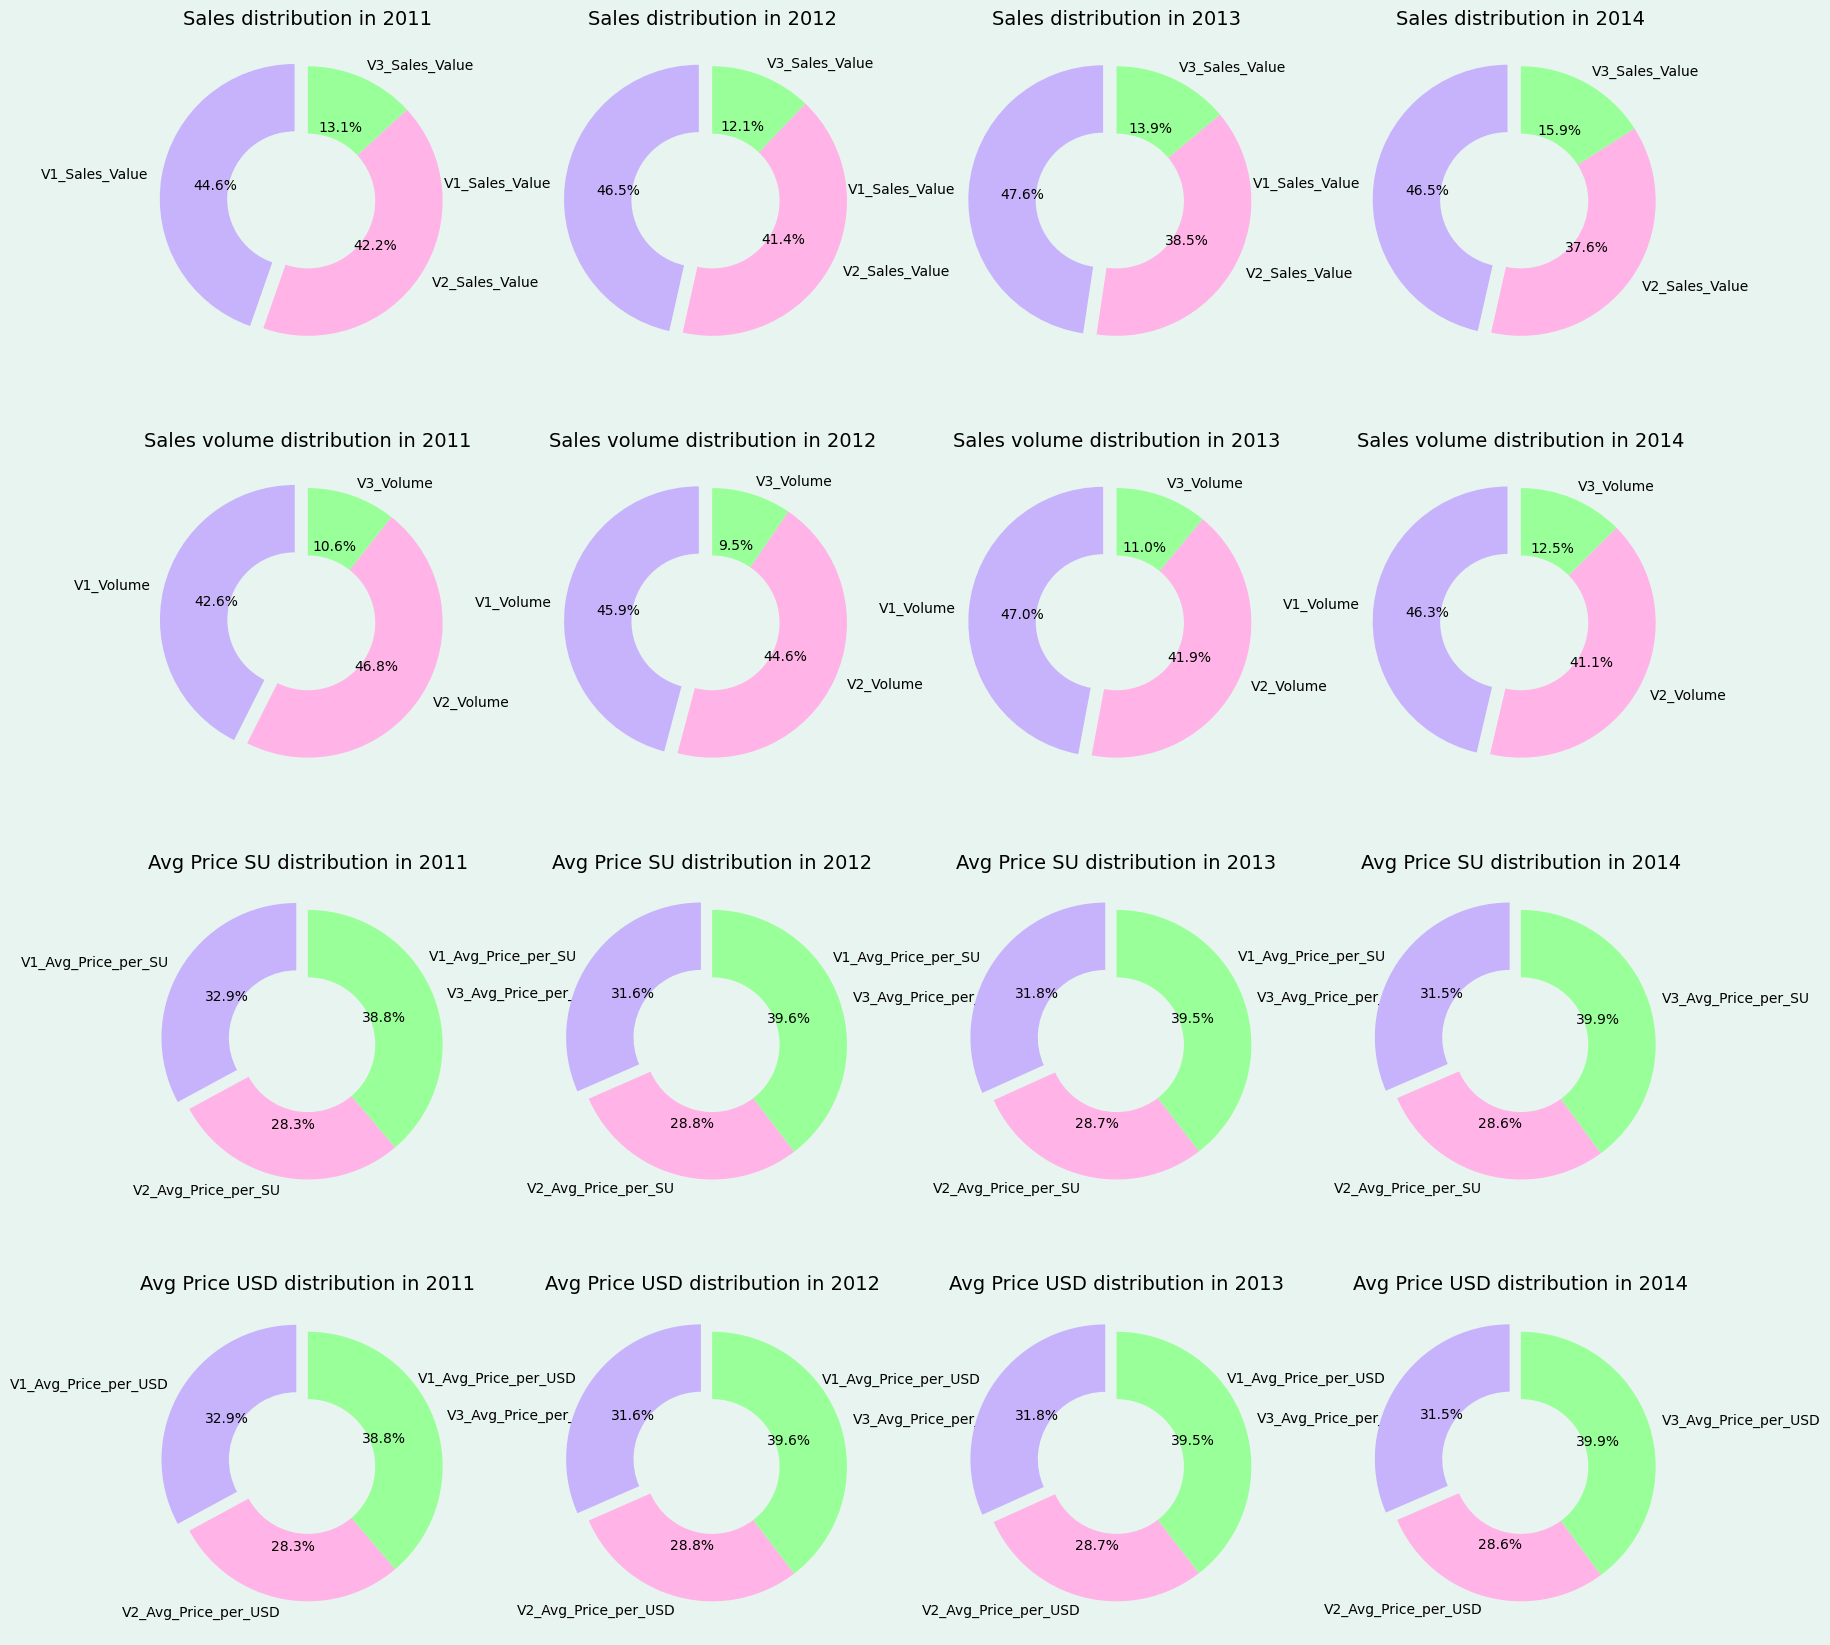

In [89]:
fig, ax = plt.subplots(4, 4, figsize=(20, 21), facecolor='#e8f4f0')
years = [2011, 2012, 2013, 2014]
string = ['Sales', 'Sales volume', 'Avg Price SU', 'Avg Price USD']
def graph(i, j, years, ax, fig, values, labels, string):
    colors = ['#c7b3fb', '#ffb3e6', '#99ff99']  
    ax[i][j].pie(
            values, 
            labels=labels, 
            autopct='%1.1f%%', 
            startangle=90, 
            wedgeprops=dict(width=.5),
            colors=colors, 
            explode=(0.1, 0, 0)  # Optional: explode the first slice for emphasis
        )
    
        # Set the title for each pie chart
    ax[i][j].set_title(f'{string} distribution in {years}', fontsize=14)
    

graph(0, 0, years[0], ax, fig, [13684.580000,12944.113333,4025.690000], ['V1_Sales_Value','V2_Sales_Value','V3_Sales_Value'], string[0])
graph(0, 1, years[1], ax, fig, [17208.896667,15318.739167,4495.165000], ['V1_Sales_Value','V2_Sales_Value','V3_Sales_Value'], string[0])
graph(0, 2, years[2], ax, fig, [19326.370000,15605.167500,5642.670000], ['V1_Sales_Value','V2_Sales_Value','V3_Sales_Value'], string[0])
graph(0, 3, years[3], ax, fig, [19363.041818,15668.921818,6646.317273], ['V1_Sales_Value','V2_Sales_Value','V3_Sales_Value'], string[0])

graph(1, 0, years[0], ax, fig, [39330.546667,43233.195000,9825.840000], ['V1_Volume','V2_Volume','V3_Volume'], string[1])
graph(1, 1, years[1], ax, fig, [47890.765833,46561.947500,9966.138333], ['V1_Volume','V2_Volume','V3_Volume'], string[1])
graph(1, 2, years[2], ax, fig, [52576.872500,46871.912500,12317.488333], ['V1_Volume','V2_Volume','V3_Volume'], string[1])
graph(1, 3, years[3], ax, fig, [52808.702727,46899.200909,14286.720909], ['V1_Volume','V2_Volume','V3_Volume'], string[1])

graph(2, 0, years[0], ax, fig, [347.868055,299.318903,409.972911], ['V1_Avg_Price_per_SU','V2_Avg_Price_per_SU','V3_Avg_Price_per_SU'], string[2])
graph(2, 1, years[1], ax, fig, [360.106804,329.020096,451.623963], ['V1_Avg_Price_per_SU','V2_Avg_Price_per_SU','V3_Avg_Price_per_SU'], string[2])
graph(2, 2, years[2], ax, fig, [368.101187,332.999550,458.136096], ['V1_Avg_Price_per_SU','V2_Avg_Price_per_SU','V3_Avg_Price_per_SU'], string[2])
graph(2, 3, years[3], ax, fig, [367.407859,334.057498,465.385030], ['V1_Avg_Price_per_SU','V2_Avg_Price_per_SU','V3_Avg_Price_per_SU'], string[2])


graph(3, 0, years[0], ax, fig, [45.222847,38.911457,53.296478], ['V1_Avg_Price_per_USD','V2_Avg_Price_per_USD','V3_Avg_Price_per_USD'], string[3])
graph(3, 1, years[1], ax, fig, [46.813885,42.772613,58.711115], ['V1_Avg_Price_per_USD','V2_Avg_Price_per_USD','V3_Avg_Price_per_USD'], string[3])
graph(3, 2, years[2], ax, fig, [47.853154,43.289941,59.557692], ['V1_Avg_Price_per_USD','V2_Avg_Price_per_USD','V3_Avg_Price_per_USD'], string[3])
graph(3, 3, years[3], ax, fig, [47.763022,43.427475,60.500054], ['V1_Avg_Price_per_USD','V2_Avg_Price_per_USD','V3_Avg_Price_per_USD'], string[3])
plt.show()


Note: Data for the years 2011 and 2014 is incomplete.

=> For 2011, only partial information is available.

=> For 2014, some data points are missing, leading to potential inaccuracies.

In [90]:
sales['Period'] = media['Period'] # converting sales period column to date format

In [91]:
sales.columns # Displaying sales data columns

Index(['Period', 'Brand_Sales_Value', 'V1_Sales_Value', 'V2_Sales_Value',
       'V3_Sales_Value', 'Brand_Volume', 'V1_Volume', 'V2_Volume', 'V3_Volume',
       'Brand_Avg_Price_per_SU', 'V1_Avg_Price_per_SU', 'V2_Avg_Price_per_SU',
       'V3_Avg_Price_per_SU', 'Brand_Avg_Price_per_USD',
       'V1_Avg_Price_per_USD', 'V2_Avg_Price_per_USD', 'V3_Avg_Price_per_USD',
       'Brand_WTD', 'V1_WTD', 'V2_WTD', 'V3_WTD', 'Brand_NUMD', 'V1_NUMD',
       'V2_NUMD', 'V3_NUMD', 'Brand_Shipment', 'V1_Shipment', 'V2_Shipment',
       'V3_Shipment'],
      dtype='object')

In [92]:
# function to plot line chart for N number of columns on the basis of Period column
def plot_line(sales, columns, title, xlabel, ylabel):
    
    # Plot multiple columns
    plt.figure(figsize=(12, 6))

    for col in columns:
        plt.plot(sales['Period'], sales[col], 'o-',label=col)

    # Ensure all dates are shown
    plt.xticks(ticks=sales['Period'], labels=sales['Period'].dt.strftime('%Y-%m'), rotation=90)

    # Customize the plot
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # Show the plot
    plt.tight_layout()
    plt.show()


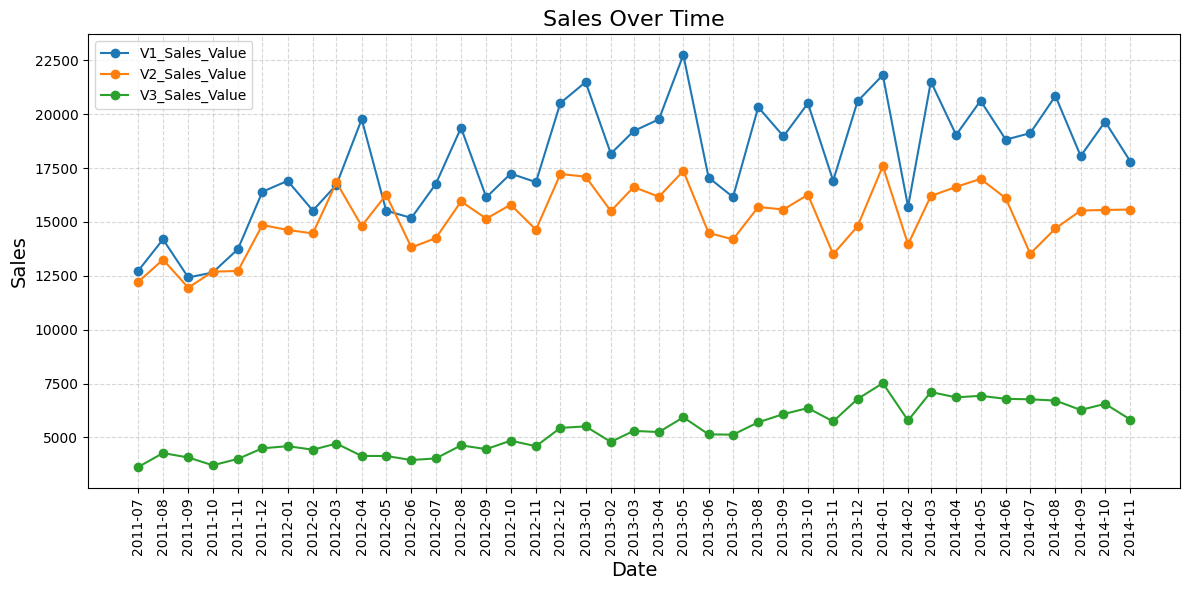

In [93]:
plot_line(sales, ['V1_Sales_Value','V2_Sales_Value','V3_Sales_Value'], 'Sales Over Time', 'Date', 'Sales')

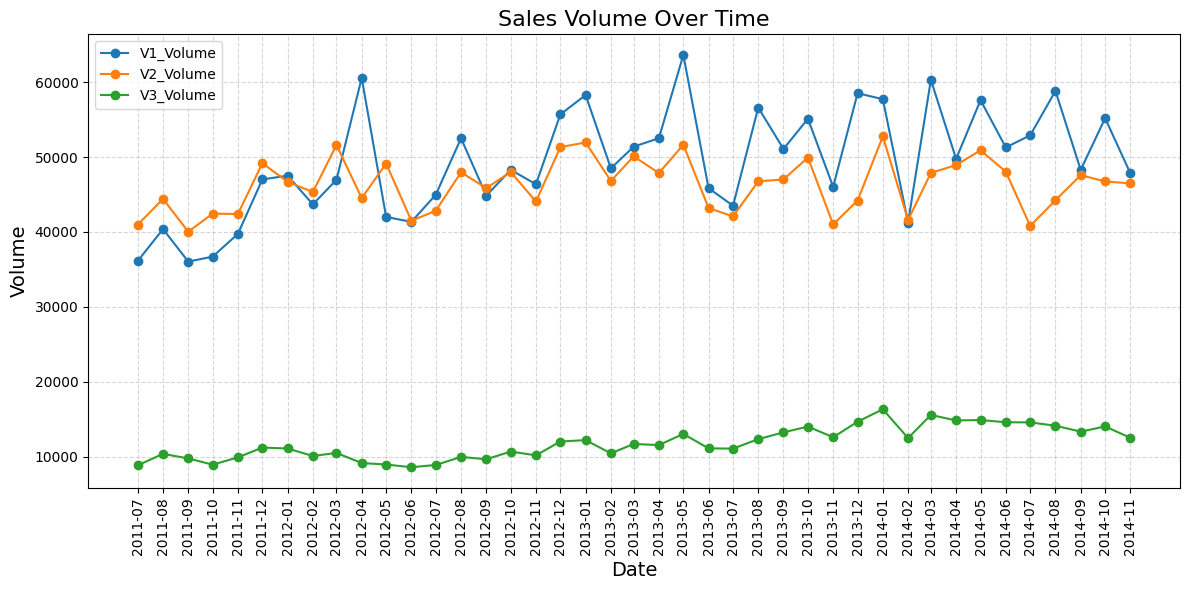

In [94]:
plot_line(sales, ['V1_Volume', 'V2_Volume', 'V3_Volume'], 'Sales Volume Over Time', 'Date', 'Volume')

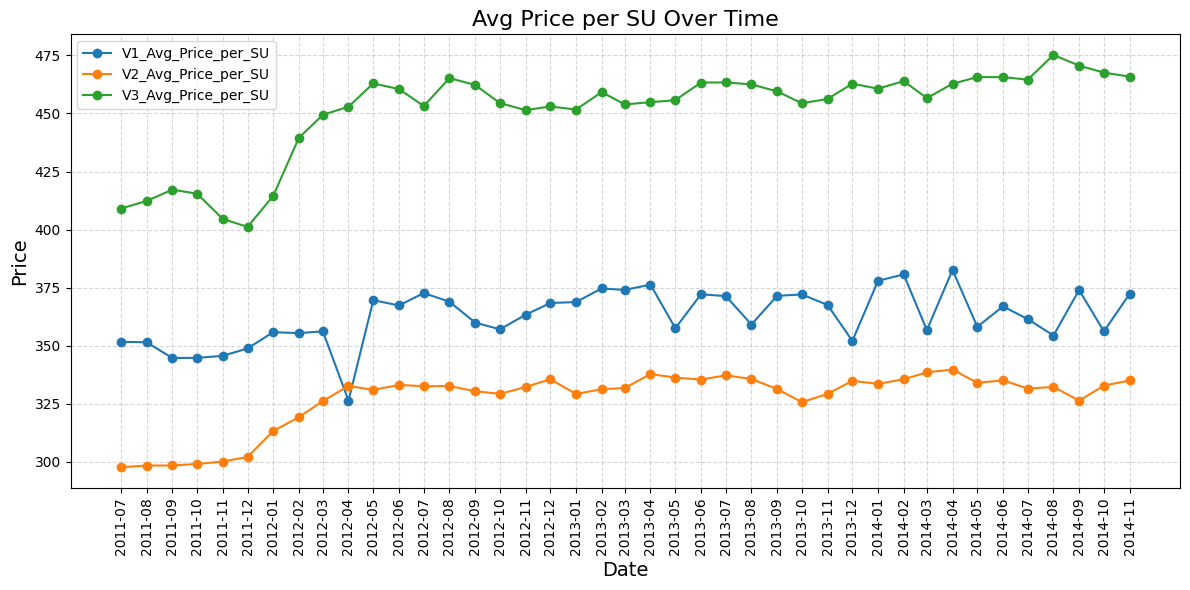

In [95]:
plot_line(sales, ['V1_Avg_Price_per_SU', 'V2_Avg_Price_per_SU','V3_Avg_Price_per_SU'], 'Avg Price per SU Over Time', 'Date', 'Price')

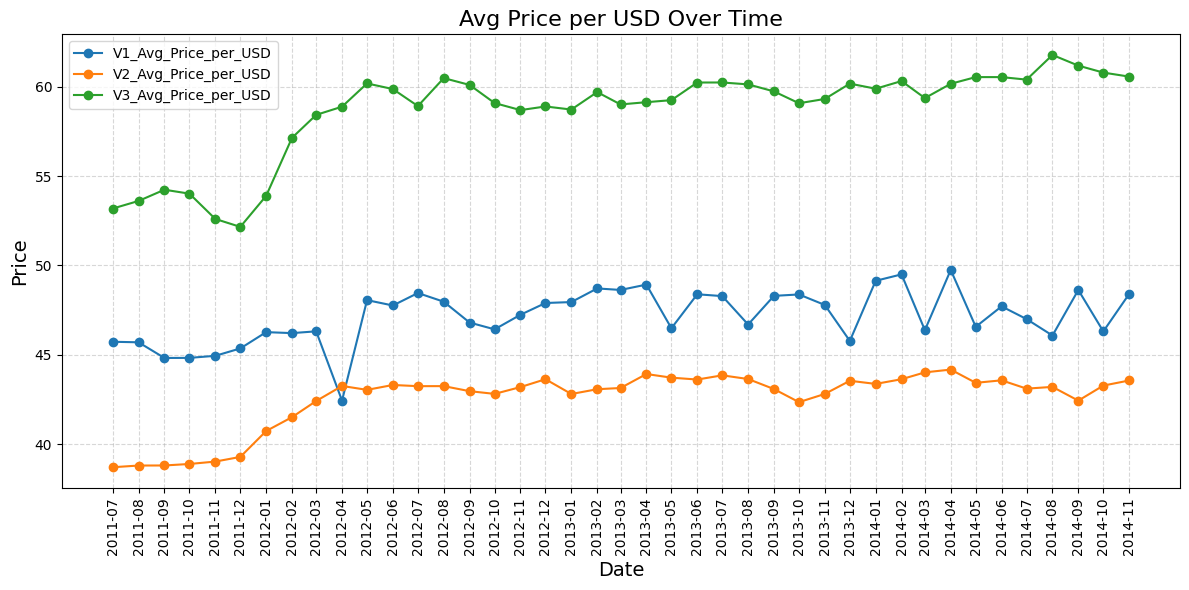

In [96]:
plot_line(sales, ['V1_Avg_Price_per_USD', 'V2_Avg_Price_per_USD', 'V3_Avg_Price_per_USD'], 'Avg Price per USD Over Time', 'Date', 'Price')

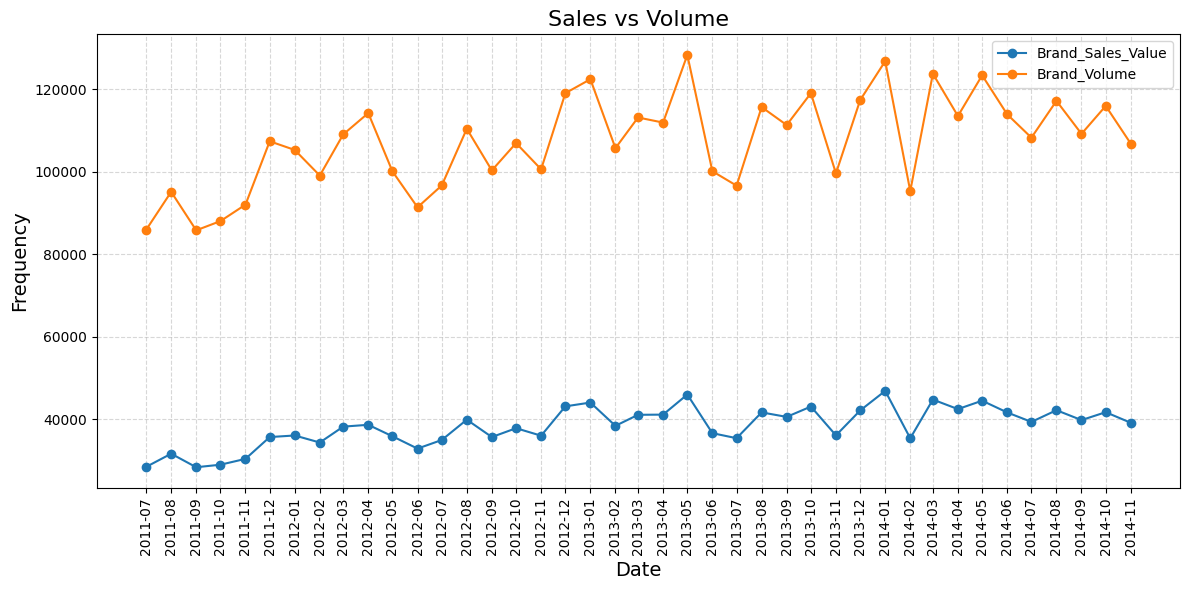

In [97]:
plot_line(sales, ['Brand_Sales_Value','Brand_Volume'], 'Sales vs Volume', 'Date', 'Frequency')

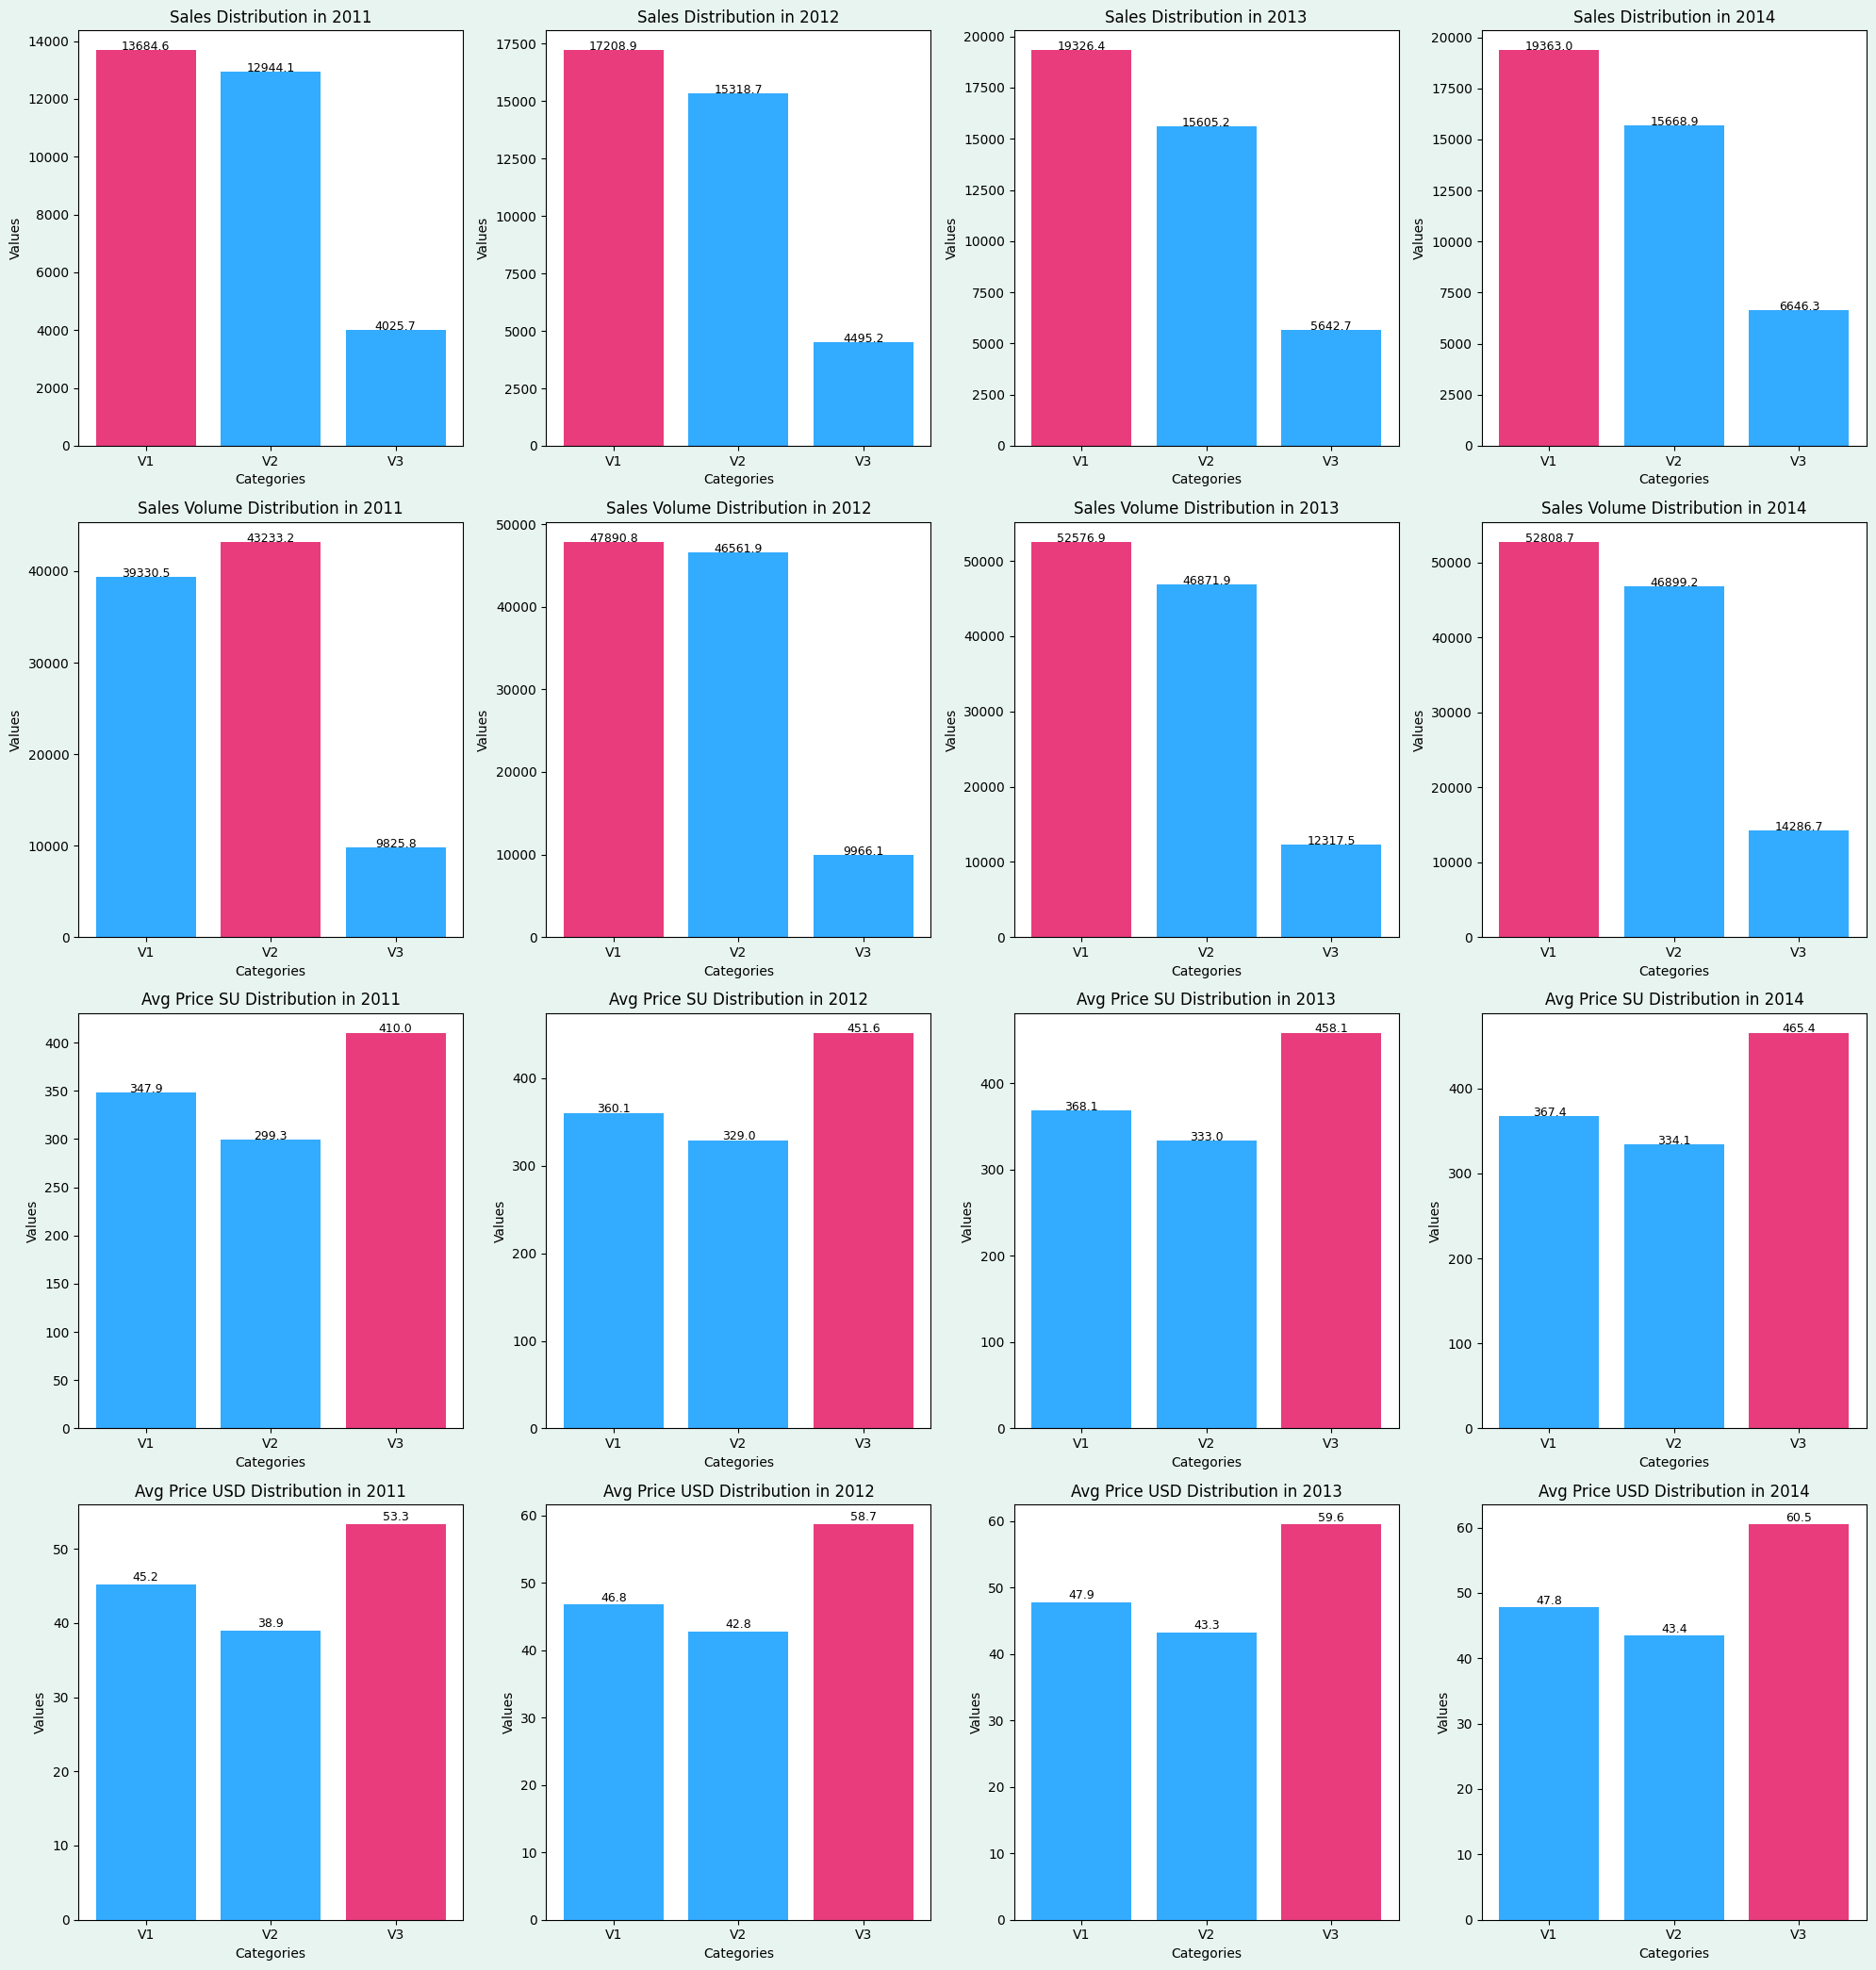

In [98]:

fig, ax = plt.subplots(4, 4, figsize=(20, 21), facecolor='#e8f4f0')
years = [2011, 2012, 2013, 2014]
categories = ['V1', 'V2', 'V3']
string = ['Sales', 'Sales Volume', 'Avg Price SU', 'Avg Price USD']

# Define the graph function for bar charts
def graph(i, j, year, ax, values, labels, title):
    # Highlight the maximum value
    max_value = max(values)
    colors = ['#0096FF' if val != max_value else '#E30B5C' for val in values]
    
    # Create a bar chart
    ax[i][j].bar(labels, values, color=colors, alpha=0.8)
    ax[i][j].set_title(f'{title} Distribution in {year}', fontsize=12)
    ax[i][j].set_ylabel('Values', fontsize=10)
    ax[i][j].set_xlabel('Categories', fontsize=10)
    
    # Add values above bars
    for idx, val in enumerate(values):
        ax[i][j].text(idx, val + 0.5, f'{val:.1f}', ha='center', fontsize=9)

# Sales data
graph(0, 0, years[0], ax, [13684.580000, 12944.113333, 4025.690000], categories, string[0])
graph(0, 1, years[1], ax, [17208.896667, 15318.739167, 4495.165000], categories, string[0])
graph(0, 2, years[2], ax, [19326.370000, 15605.167500, 5642.670000], categories, string[0])
graph(0, 3, years[3], ax, [19363.041818, 15668.921818, 6646.317273], categories, string[0])

# Sales Volume data
graph(1, 0, years[0], ax, [39330.546667, 43233.195000, 9825.840000], categories, string[1])
graph(1, 1, years[1], ax, [47890.765833, 46561.947500, 9966.138333], categories, string[1])
graph(1, 2, years[2], ax, [52576.872500, 46871.912500, 12317.488333], categories, string[1])
graph(1, 3, years[3], ax, [52808.702727, 46899.200909, 14286.720909], categories, string[1])

# Avg Price SU data
graph(2, 0, years[0], ax, [347.868055, 299.318903, 409.972911], categories, string[2])
graph(2, 1, years[1], ax, [360.106804, 329.020096, 451.623963], categories, string[2])
graph(2, 2, years[2], ax, [368.101187, 332.999550, 458.136096], categories, string[2])
graph(2, 3, years[3], ax, [367.407859, 334.057498, 465.385030], categories, string[2])

# Avg Price USD data
graph(3, 0, years[0], ax, [45.222847, 38.911457, 53.296478], categories, string[3])
graph(3, 1, years[1], ax, [46.813885, 42.772613, 58.711115], categories, string[3])
graph(3, 2, years[2], ax, [47.853154, 43.289941, 59.557692], categories, string[3])
graph(3, 3, years[3], ax, [47.763022, 43.427475, 60.500054], categories, string[3])

plt.tight_layout()
plt.show()


Note: Data for the years 2011 and 2014 is incomplete.

=> For 2011, only partial information is available.

=> For 2014, some data points are missing, leading to potential inaccuracies.

For Media Data :

In [99]:
media.columns # Displaying Media Data Columns

Index(['Period',
       'brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Impressions',
       'brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Clicks',
       'brand_Search_Spends_SEM_Yahoo_Always_on_USM',
       'brand_Social_Ad_Facebook_No_of_Likes', 'brand_Social_Ad_Facebook_PTAT',
       'brand_Birth_Rate_No_of_Births_ppl_CPA',
       'brand_Youtube_Brand_Channel_Side_by_Side_Video_No_of_Views_P&G_Digital_Agency',
       'brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G',
       'v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR',
       'v1_TV_GRP_F30_39_ISP_TV_Total_GRP_AOR',
       'v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR',
       'v1_TV_Spends_ISP_TV_Spends_USM_AOR',
       'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital',
       'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital',
       'v1_iMedia_TOTAL_Impression_Click_Parenting_Site_BBK_No_of_impressions_Digital',
       'v1_iMedia_TOTAL_Impression_Click_Parenting_Site_BBK_No_of_Clicks_Dig

Media Data Distribution:


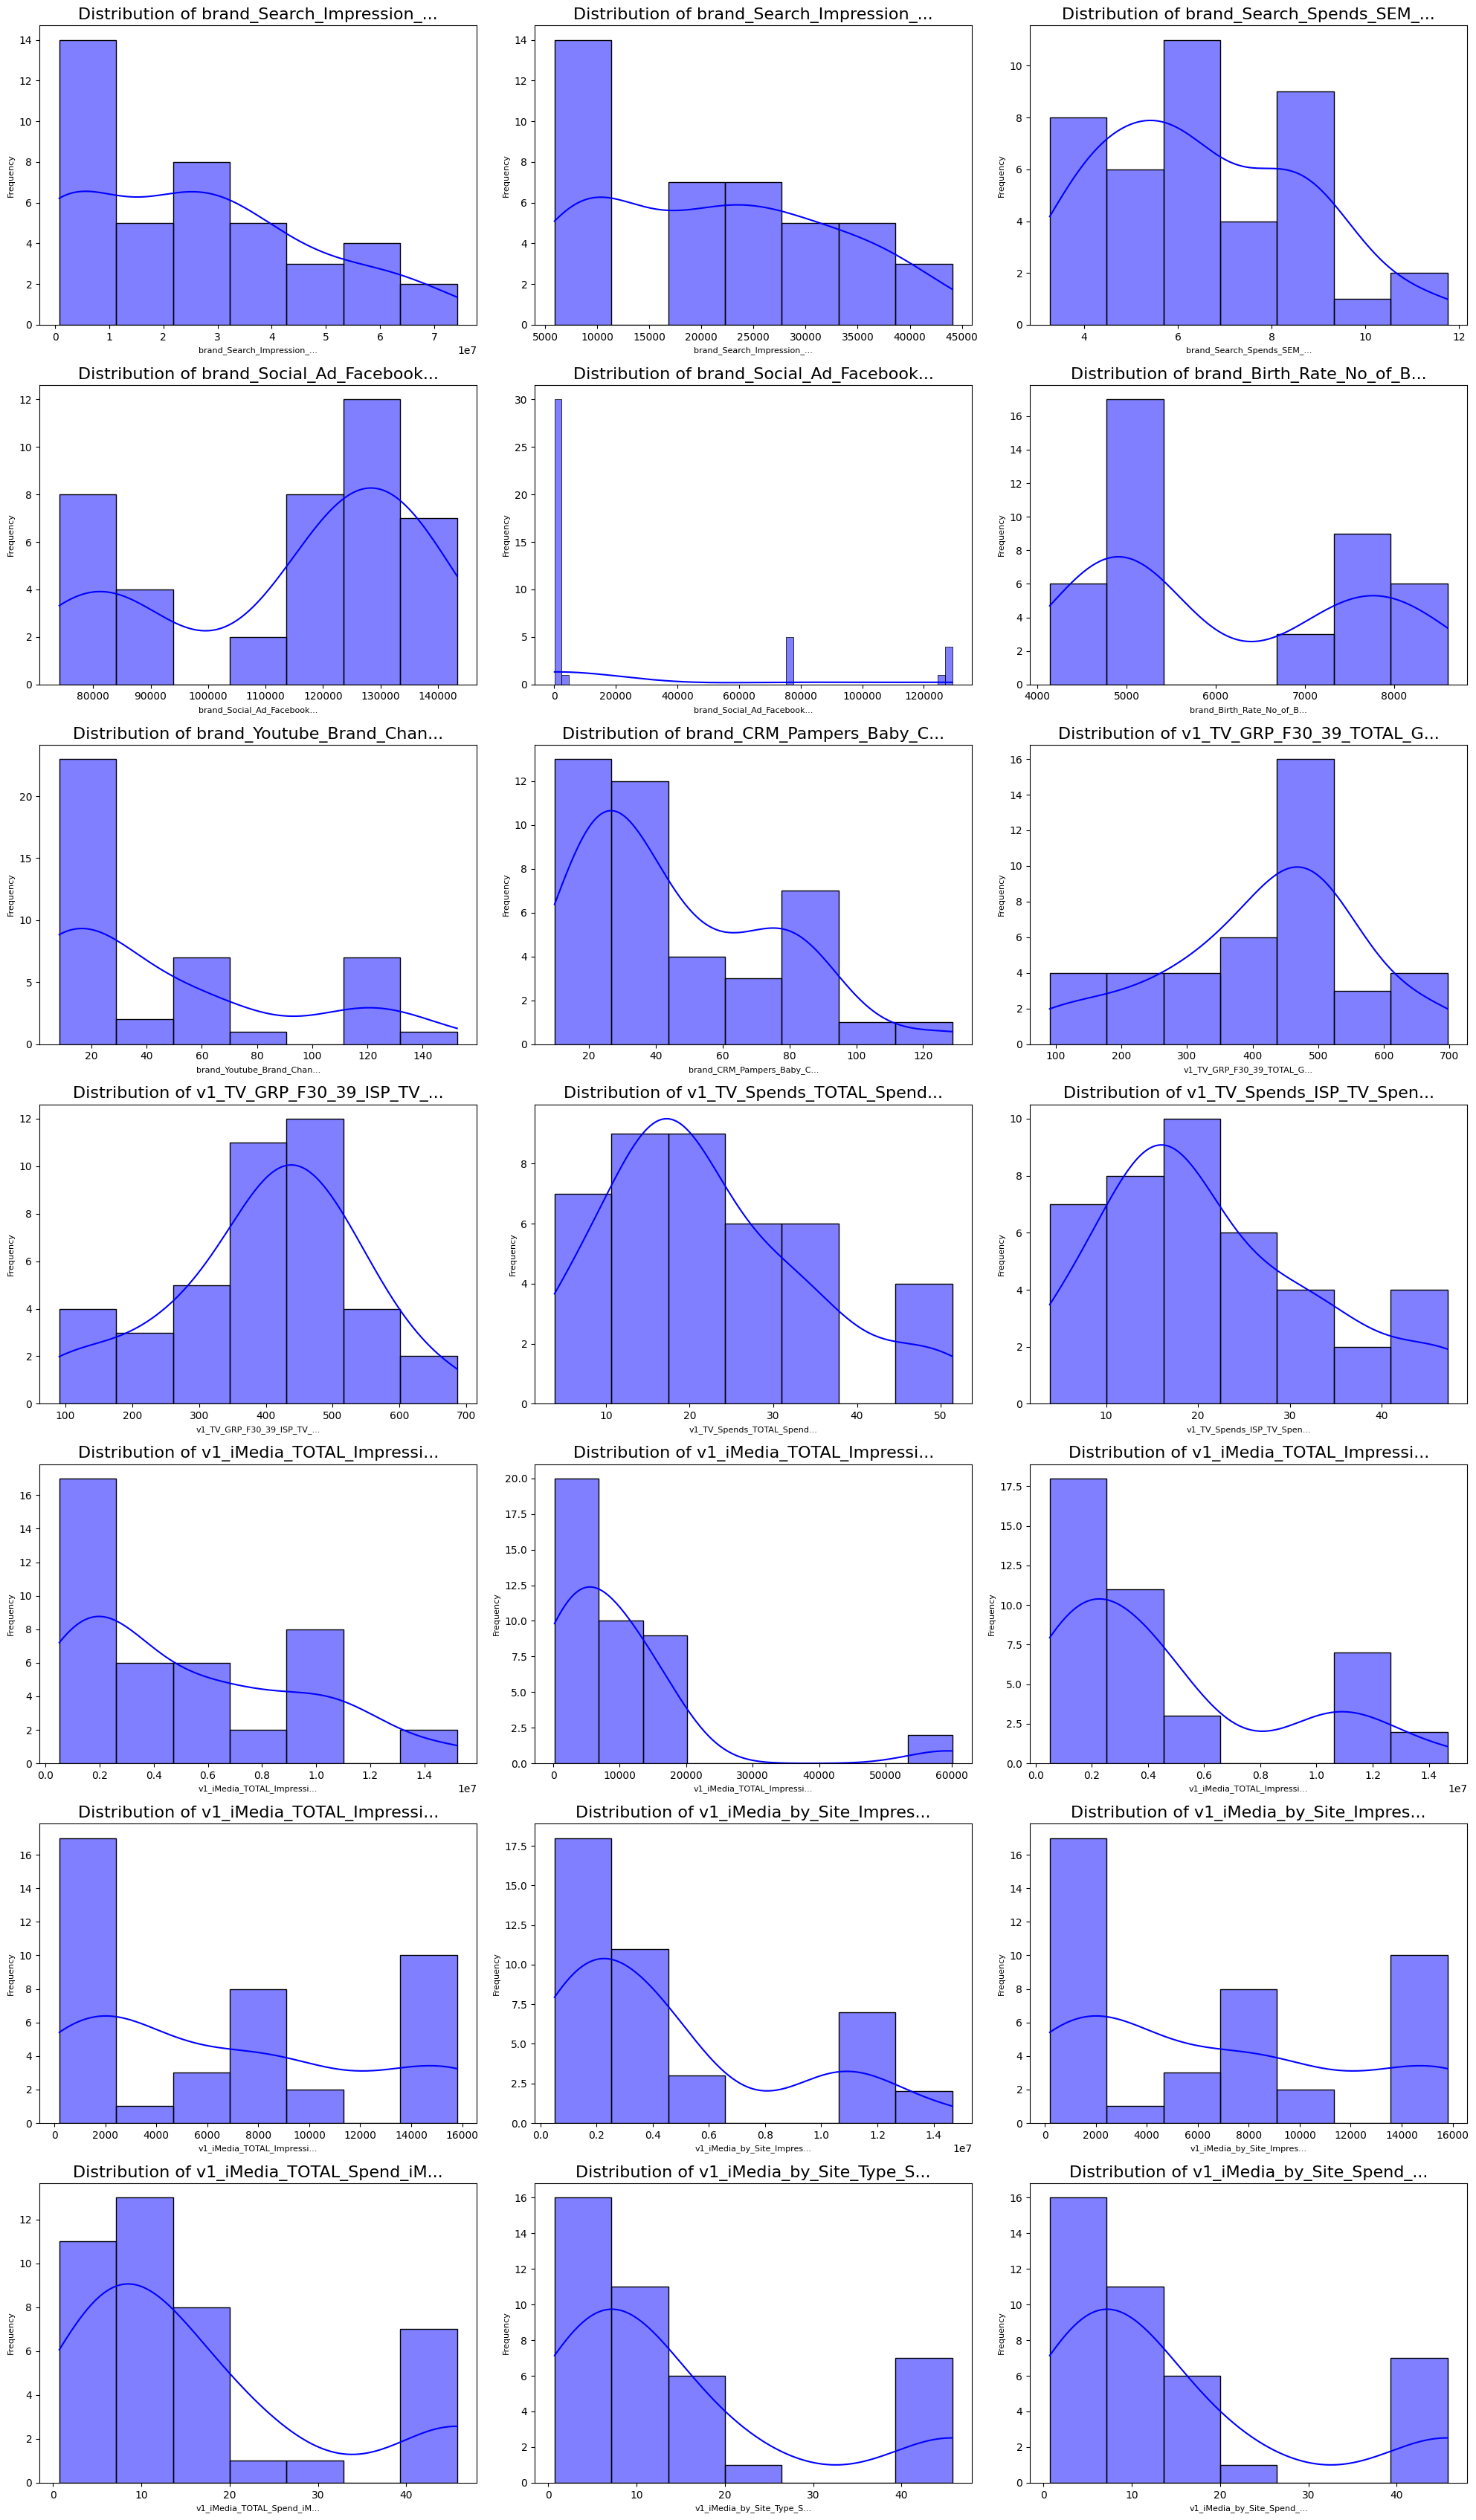

In [100]:
print("Media Data Distribution:")

# Histograms for to represent media Data
plt.figure(figsize=(20, 34))

i = 1  # Initialize subplot counter
for col in media.columns:
    if col == 'Period':
        continue
    plt.subplot(7, 3, i)
    sns.histplot(media[col], kde=True, color='blue')
    short_col = col[:24] + "..." if len(col) > 15 else col  # Truncate long names
    plt.title(f'Distribution of {short_col}', fontsize=16)  # Adjust font size
    plt.xlabel(short_col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    i += 1  # Increment only if a plot is created

plt.tight_layout()
plt.show()



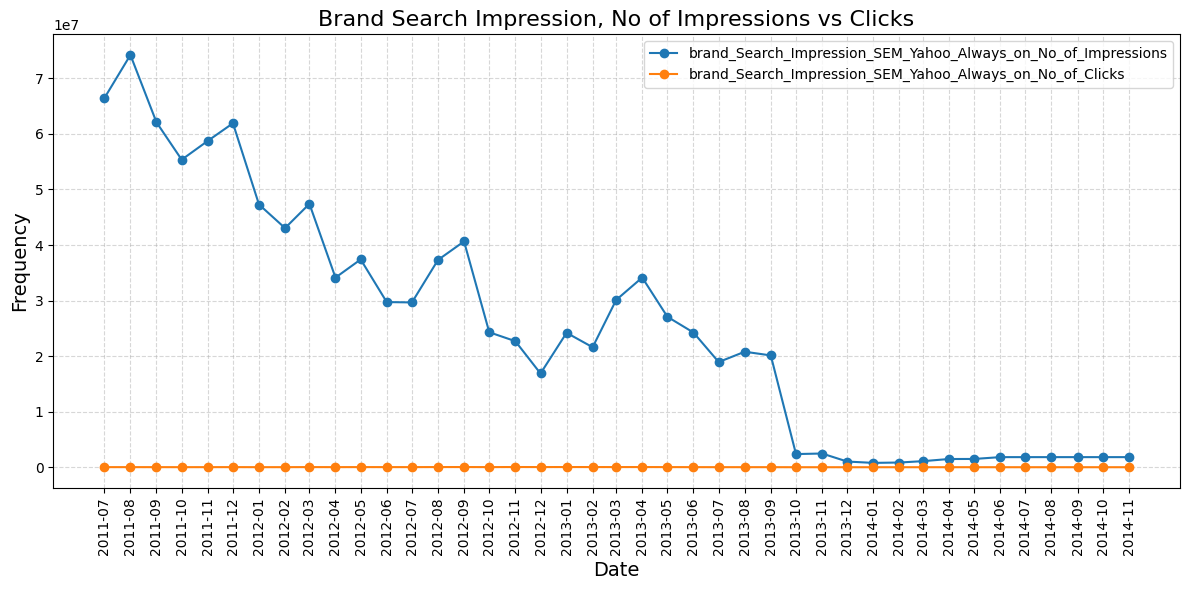

In [101]:
plot_line(media, ['brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Impressions','brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Clicks'], 'Brand Search Impression, No of Impressions vs Clicks', 'Date', 'Frequency')

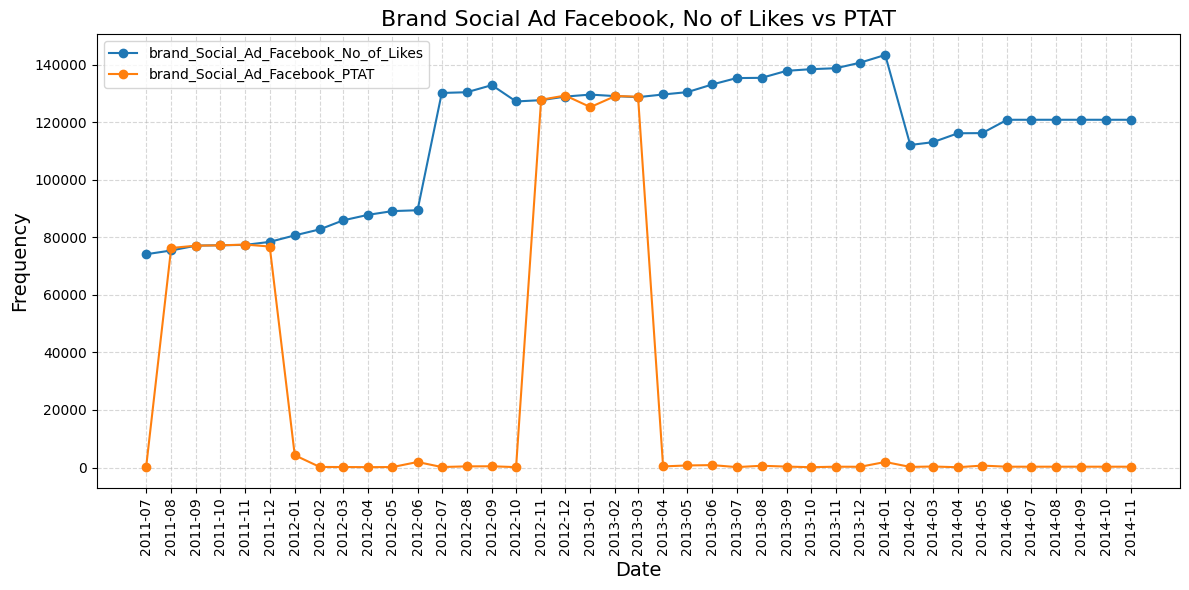

In [102]:
plot_line(media, ['brand_Social_Ad_Facebook_No_of_Likes','brand_Social_Ad_Facebook_PTAT'], 'Brand Social Ad Facebook, No of Likes vs PTAT', 'Date', 'Frequency')

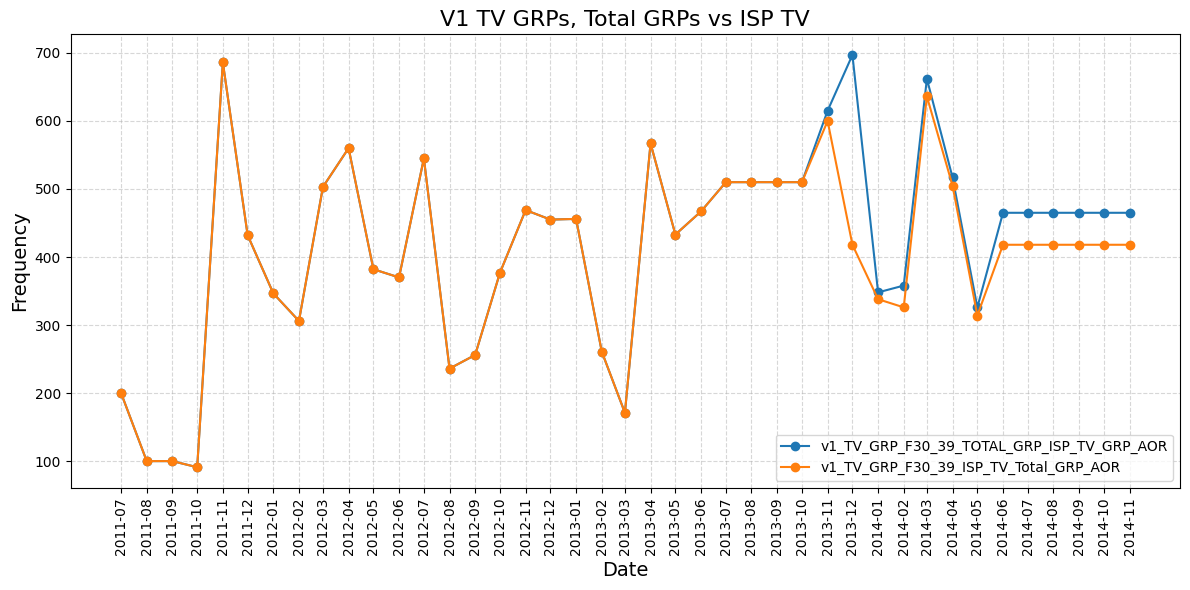

In [103]:
plot_line(media, ['v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR','v1_TV_GRP_F30_39_ISP_TV_Total_GRP_AOR'], 'V1 TV GRPs, Total GRPs vs ISP TV', 'Date', 'Frequency')

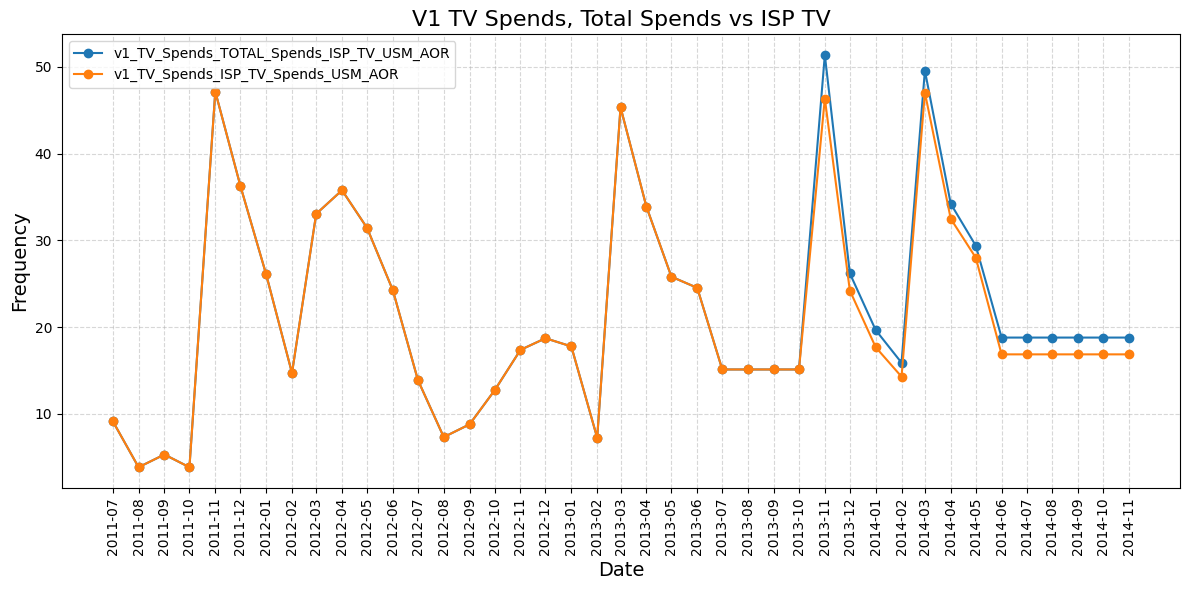

In [104]:
plot_line(media, ['v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR','v1_TV_Spends_ISP_TV_Spends_USM_AOR'], 'V1 TV Spends, Total Spends vs ISP TV', 'Date', 'Frequency')

Importing Required Libraries for Model Development

In [105]:
# importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score


from itertools import combinations


Defining Essential Functions for Model Development

In [106]:
# function to calculate adjusted r2 value

def adjusted_r2_value(r2value, x):
    k = x.shape[1]
    n = x.shape[0]
    return 1 - ( (1 - r2value) * (n - 1) / (n - k - 1) )

# function to calculate all accuracy measures
def accuracyMeasures(y_test, y_pred, x):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2value = r2_score(y_test, y_pred)
    adjusted_r2value = adjusted_r2_value(r2value, x)
    print("Mean Squared Error = %.2f\nRoot Mean Squared Error = %.2f\nMean Absolute Error = %.2f\nMean Absolute Percentage Error = %.2f%%\nR Squared Value = %.2f\nAdjusted R Squared Value = %.2f"%(mse, rmse, mae, mape, r2value, adjusted_r2value))

MODEL DEVELOPMENT AND ANALYSIS

To improve accuracy, dummy columns were added.

In [107]:
# creating dummy variables
sales_media_data['Period'] = pd.to_datetime(sales_media_data['Period'])

# Add 'Month' column to capture the month part of the date
sales_media_data['Month'] = sales_media_data['Period'].dt.month

# Create dummy variables for 'Month', using drop_first=True to avoid multicollinearity
sales_media_data = pd.get_dummies(sales_media_data, columns=['Month'], drop_first=False)
month_columns = [col for col in sales_media_data.columns if col.startswith('Month_')]
sales_media_data[month_columns] = sales_media_data[month_columns].astype(int)

In [108]:
# Ensure 'Period' is of datetime type if it's not already
sales_media_data['Period'] = pd.to_datetime(sales_media_data['Period'], errors='coerce')

# Extract month and year from the 'Period' column
sales_media_data['Year_Month'] = sales_media_data['Period'].dt.to_period('M')

In [109]:
# function to plot actual vs predicted graph
def plot_month_year_graph(y_test, y_pred, sales_media_data, title, xlabel, ylabel):
    # Ensure 'Year_Month' is in the correct datetime or string format
    x_labels = sales_media_data['Year_Month'].astype(str)  # Convert to string if necessary

    # Ensure the number of x-ticks matches your data points
    num_points = len(y_test)

    plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='green')
    plt.plot(range(len(y_test)), y_test, color='green') 

    plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
    plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

    # Set x-ticks to the Year_Month column
    plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.legend()
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

BRAND MODEL USING LINEAR REGRESSION

In [110]:
# splitting the dataset in to x and y for brand MODEL 
x = sales_media_data.loc[:,['Brand_Avg_Price_per_SU', 'brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G', 'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_8', 'Month_10', 'Month_12']].values
y = sales_media_data.loc[:,'Brand_Sales_Value'].values  

# Fix random seed for reproducibility
np.random.seed(42)
# splitting data in to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# LinearRegression algorithm
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 1034125.58
Root Mean Squared Error = 1016.92
Mean Absolute Error = 850.28
Mean Absolute Percentage Error = 2.21%
R Squared Value = 0.92
Adjusted R Squared Value = 0.89


Plotting graph for Actual vs Predicted Sales

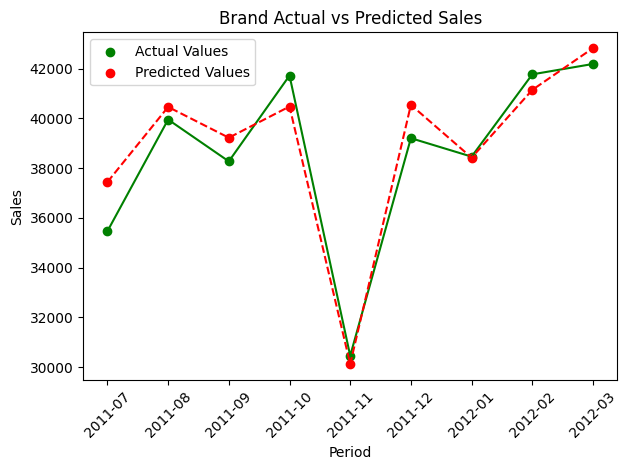

In [111]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "Brand Actual vs Predicted Sales","Period", "Sales")

V1 MODEL USING LINEAR REGRESSION

In [112]:
# Define Adstock Rate
adstock_rate = 0.75

# Ensure no NaN values in the media impressions column
media_impressions = sales_media_data['v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR']

def adstocking(adstock_rate, impressions):
    """
    Function to calculate adstocked media data.
    """
    adstocked_media = []
    for i in range(len(impressions)):
        if i == 0:
            adstocked_media.append(impressions[i])
        else:
            adstocked_media.append(impressions[i] + adstock_rate * adstocked_media[i-1])
    return adstocked_media

In [113]:
# Apply Adstock transformation
sales_media_data['V1_Media_Adstocked'] = adstocking(adstock_rate, media_impressions)

In [114]:
x = sales_media_data[['V1_Avg_Price_per_SU', 'V1_Media_Adstocked', 'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital', 'Month_1', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11']]

y = sales_media_data[['V1_Sales_Value']]

# Fix random seed for reproducibility
np.random.seed(42)
# splitting data in to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# LinearRegression algorithm
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 652543.02
Root Mean Squared Error = 807.80
Mean Absolute Error = 622.96
Mean Absolute Percentage Error = 3.55%
R Squared Value = 0.85
Adjusted R Squared Value = 0.81


Plotting graph for Actual vs Predicted Sales

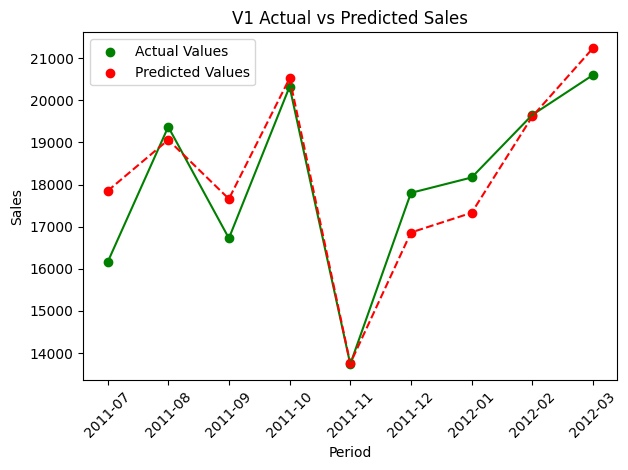

In [115]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V1 Actual vs Predicted Sales","Period", "Sales")

V2 MODEL USING LINEAR REGRESSION

In [116]:
sales_media_data.columns

Index(['Period', 'Brand_Sales_Value', 'V1_Sales_Value', 'V2_Sales_Value',
       'V3_Sales_Value', 'Brand_Volume', 'V1_Volume', 'V2_Volume', 'V3_Volume',
       'Brand_Avg_Price_per_SU', 'V1_Avg_Price_per_SU', 'V2_Avg_Price_per_SU',
       'V3_Avg_Price_per_SU', 'Brand_Avg_Price_per_USD',
       'V1_Avg_Price_per_USD', 'V2_Avg_Price_per_USD', 'V3_Avg_Price_per_USD',
       'Brand_WTD', 'V1_WTD', 'V2_WTD', 'V3_WTD', 'Brand_NUMD', 'V1_NUMD',
       'V2_NUMD', 'V3_NUMD', 'Brand_Shipment', 'V1_Shipment', 'V2_Shipment',
       'V3_Shipment',
       'brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Impressions',
       'brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Clicks',
       'brand_Search_Spends_SEM_Yahoo_Always_on_USM',
       'brand_Social_Ad_Facebook_No_of_Likes', 'brand_Social_Ad_Facebook_PTAT',
       'brand_Birth_Rate_No_of_Births_ppl_CPA',
       'brand_Youtube_Brand_Channel_Side_by_Side_Video_No_of_Views_P&G_Digital_Agency',
       'brand_CRM_Pampers_Baby_Club_Pls_add_all_

In [117]:
x = sales_media_data[['V2_Avg_Price_per_SU', 'V2_WTD', 'v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR', 'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'Month_1', 'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_9']]

y = sales_media_data[['V2_Sales_Value']]

# Fix random seed for reproducibility
np.random.seed(42)
# splitting data in to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# LinearRegression algorithm
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 111496.29
Root Mean Squared Error = 333.91
Mean Absolute Error = 275.90
Mean Absolute Percentage Error = 1.79%
R Squared Value = 0.91
Adjusted R Squared Value = 0.88


Plotting graph for Actual vs Predicted Sales

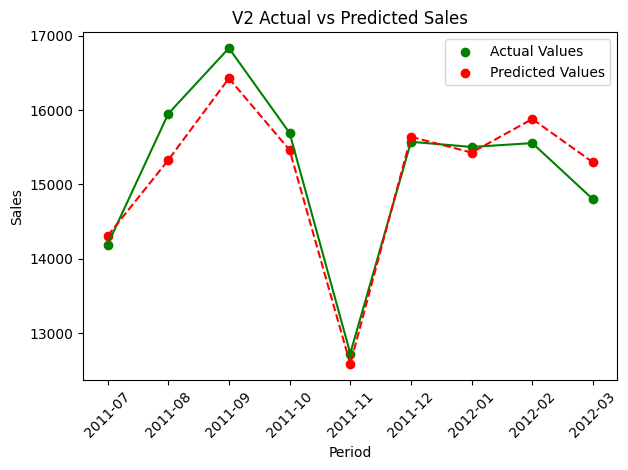

In [118]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V2 Actual vs Predicted Sales","Period", "Sales")

V3 MODEL USING LINEAR REGRESSION

In [119]:
sales_media_data.columns

Index(['Period', 'Brand_Sales_Value', 'V1_Sales_Value', 'V2_Sales_Value',
       'V3_Sales_Value', 'Brand_Volume', 'V1_Volume', 'V2_Volume', 'V3_Volume',
       'Brand_Avg_Price_per_SU', 'V1_Avg_Price_per_SU', 'V2_Avg_Price_per_SU',
       'V3_Avg_Price_per_SU', 'Brand_Avg_Price_per_USD',
       'V1_Avg_Price_per_USD', 'V2_Avg_Price_per_USD', 'V3_Avg_Price_per_USD',
       'Brand_WTD', 'V1_WTD', 'V2_WTD', 'V3_WTD', 'Brand_NUMD', 'V1_NUMD',
       'V2_NUMD', 'V3_NUMD', 'Brand_Shipment', 'V1_Shipment', 'V2_Shipment',
       'V3_Shipment',
       'brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Impressions',
       'brand_Search_Impression_SEM_Yahoo_Always_on_No_of_Clicks',
       'brand_Search_Spends_SEM_Yahoo_Always_on_USM',
       'brand_Social_Ad_Facebook_No_of_Likes', 'brand_Social_Ad_Facebook_PTAT',
       'brand_Birth_Rate_No_of_Births_ppl_CPA',
       'brand_Youtube_Brand_Channel_Side_by_Side_Video_No_of_Views_P&G_Digital_Agency',
       'brand_CRM_Pampers_Baby_Club_Pls_add_all_

In [120]:
x = sales_media_data[[
     'V3_Avg_Price_per_SU', 'V3_Shipment', 'v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR', 
    'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'V1_Media_Adstocked', 'Month_1','Month_11', 'Month_4','Month_1',  'Month_6'
]]
y = sales_media_data[['V3_Sales_Value']]

# Fix random seed for reproducibility
np.random.seed(42)
# splitting data in to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# LinearRegression algorithm
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 116939.92
Root Mean Squared Error = 341.96
Mean Absolute Error = 305.68
Mean Absolute Percentage Error = 6.14%
R Squared Value = 0.85
Adjusted R Squared Value = 0.80


Plotting graph for Actual vs Predicted Sales

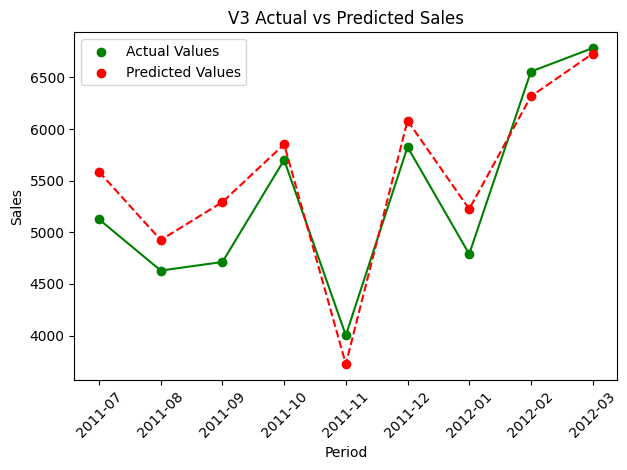

In [121]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V3 Actual vs Predicted Sales","Period", "Sales")

Brand Model Using Lasso Regression

In [122]:
# Splitting the dataset into X and Y for brand model
x = sales_media_data.loc[:, ['Brand_Avg_Price_per_SU', 'brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G', 
                             'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_8', 'Month_10', 'Month_12']].values
y = sales_media_data.loc[:, 'Brand_Sales_Value'].values  

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# Lasso Regression model
model = Lasso(alpha=0.1)  # You can adjust the alpha parameter to control the regularization strength

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 1034537.54
Root Mean Squared Error = 1017.12
Mean Absolute Error = 849.95
Mean Absolute Percentage Error = 2.21%
R Squared Value = 0.92
Adjusted R Squared Value = 0.89


Plotting graph for Actual vs Predicted Sales

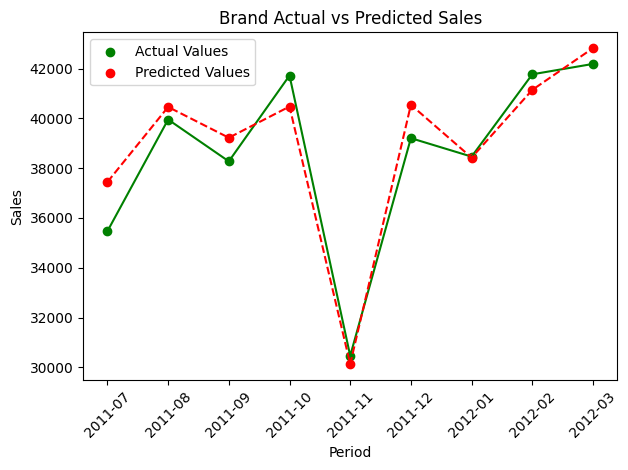

In [123]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "Brand Actual vs Predicted Sales","Period", "Sales")

V1 Model Using Lasso Regression

In [124]:

# Splitting the dataset into X and Y for brand model
x = sales_media_data[['V1_Avg_Price_per_SU', 'V1_Media_Adstocked', 'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital', 'Month_1', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11']]

y = sales_media_data[['V1_Sales_Value']].values


# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Lasso Regression model
model = Lasso(alpha=0.1)  # You can adjust alpha to control the strength of the regularization

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)


Mean Squared Error = 652629.89
Root Mean Squared Error = 807.86
Mean Absolute Error = 622.92
Mean Absolute Percentage Error = 13.75%
R Squared Value = 0.85
Adjusted R Squared Value = 0.81


Plotting graph for Actual vs Predicted Sales

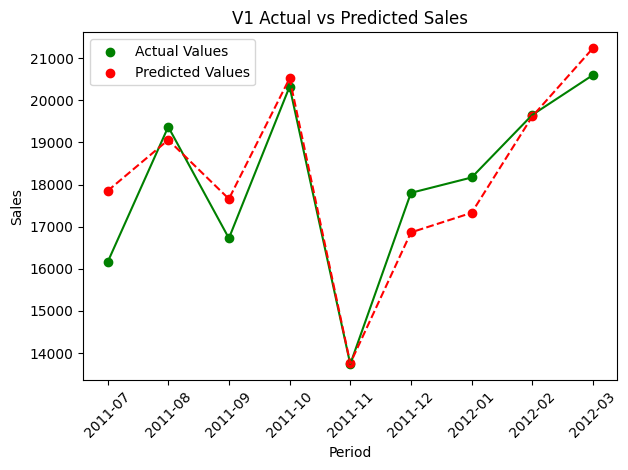

In [125]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V1 Actual vs Predicted Sales","Period", "Sales")

V2 Model Using Lasso Regression

In [126]:

# Splitting the dataset into X and Y for the brand model
x = sales_media_data[['V2_Avg_Price_per_SU', 'V2_WTD', 'v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR', 
                      'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'Month_1', 
                      'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_9']]

y = sales_media_data[['V2_Sales_Value']].values

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Lasso Regression model
model = Lasso(alpha=0.1)  # You can adjust alpha to control the strength of the regularization

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 111575.82
Root Mean Squared Error = 334.03
Mean Absolute Error = 275.63
Mean Absolute Percentage Error = 7.63%
R Squared Value = 0.91
Adjusted R Squared Value = 0.88


Plotting graph for Actual vs Predicted Sales

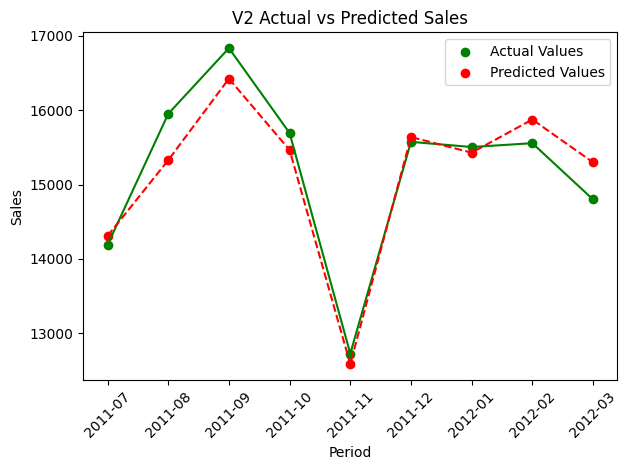

In [127]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V2 Actual vs Predicted Sales","Period", "Sales")

V3 Model Using Lasso Regression

In [128]:
# Splitting the dataset into X and Y for the brand model
x = sales_media_data[[
    'V3_Avg_Price_per_SU', 'V3_Shipment', 'v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR', 
    'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'V1_Media_Adstocked', 
    'Month_1', 'Month_11', 'Month_4', 'Month_6'
]]
y = sales_media_data[['V3_Sales_Value']].values

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Lasso Regression model
model = Lasso(alpha=0.1)  # You can adjust alpha to control the regularization strength

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 117388.32
Root Mean Squared Error = 342.62
Mean Absolute Error = 305.99
Mean Absolute Percentage Error = 19.82%
R Squared Value = 0.85
Adjusted R Squared Value = 0.80


Plotting graph for Actual vs Predicted Sales

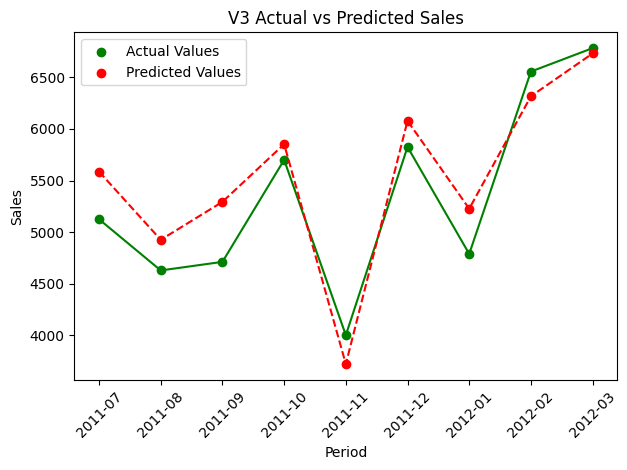

In [129]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V3 Actual vs Predicted Sales","Period", "Sales")

Brand Model Using Ridge Regression

In [130]:
# Splitting the dataset into X and Y for the brand model
x = sales_media_data.loc[:, ['Brand_Avg_Price_per_SU', 'brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G', 
                             'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_8', 'Month_10', 'Month_12']].values
y = sales_media_data.loc[:, 'Brand_Sales_Value'].values  

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# Ridge Regression model
model = Ridge(alpha=0.1)  # You can adjust the alpha parameter to control the regularization strength

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 1046592.25
Root Mean Squared Error = 1023.03
Mean Absolute Error = 809.20
Mean Absolute Percentage Error = 2.10%
R Squared Value = 0.92
Adjusted R Squared Value = 0.89


Plotting graph for Actual vs Predicted Sales

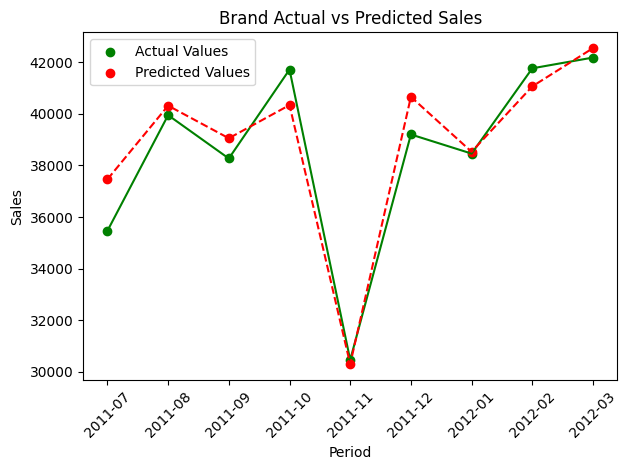

In [131]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "Brand Actual vs Predicted Sales","Period", "Sales")

V1 Model Using Ridge Regression

In [132]:
# Splitting the dataset into X and Y for the brand model
x = sales_media_data[['V1_Avg_Price_per_SU', 'V1_Media_Adstocked', 'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital', 
                      'Month_1', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11']]

y = sales_media_data[['V1_Sales_Value']].values

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ridge Regression model
model = Ridge(alpha=0.1)  # You can adjust alpha to control the strength of the regularization

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 644993.13
Root Mean Squared Error = 803.11
Mean Absolute Error = 627.07
Mean Absolute Percentage Error = 3.60%
R Squared Value = 0.85
Adjusted R Squared Value = 0.81


Plotting graph for Actual vs Predicted Sales

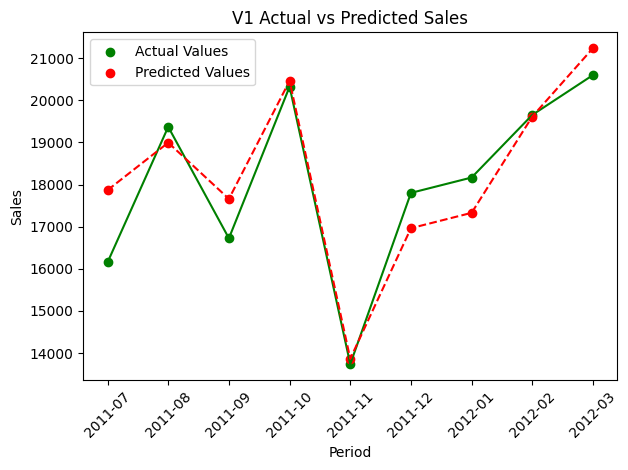

In [133]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V1 Actual vs Predicted Sales","Period", "Sales")

V2 Model Using Ridge Regression

In [134]:

# Splitting the dataset into X and Y for the brand model
x = sales_media_data[['V2_Avg_Price_per_SU', 'V2_WTD', 'v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR', 
                      'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'Month_1', 
                      'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_9']]

y = sales_media_data[['V2_Sales_Value']].values

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ridge Regression model
model = Ridge(alpha=0.1)  # You can adjust alpha to control the strength of the regularization

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 128657.90
Root Mean Squared Error = 358.69
Mean Absolute Error = 276.59
Mean Absolute Percentage Error = 1.77%
R Squared Value = 0.90
Adjusted R Squared Value = 0.86


Plotting graph for Actual vs Predicted Sales

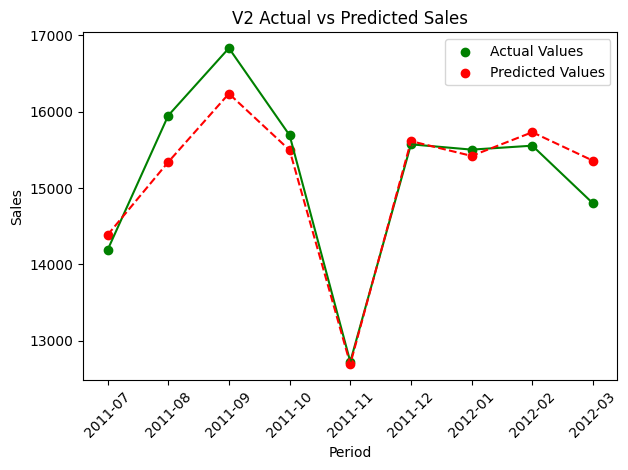

In [135]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V2 Actual vs Predicted Sales","Period", "Sales")

V3 Model Using Ridge Regression

In [136]:

# Splitting the dataset into X and Y for the brand model
x = sales_media_data[[
    'V3_Avg_Price_per_SU', 'V3_Shipment', 'v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR', 
    'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'V1_Media_Adstocked', 
    'Month_1', 'Month_11', 'Month_4', 'Month_6'
]]
y = sales_media_data[['V3_Sales_Value']].values

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ridge Regression model
model = Ridge(alpha=0.1)  # You can adjust alpha to control the strength of the regularization

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 119578.72
Root Mean Squared Error = 345.80
Mean Absolute Error = 307.66
Mean Absolute Percentage Error = 6.19%
R Squared Value = 0.85
Adjusted R Squared Value = 0.80


Plotting graph for Actual vs Predicted Sales

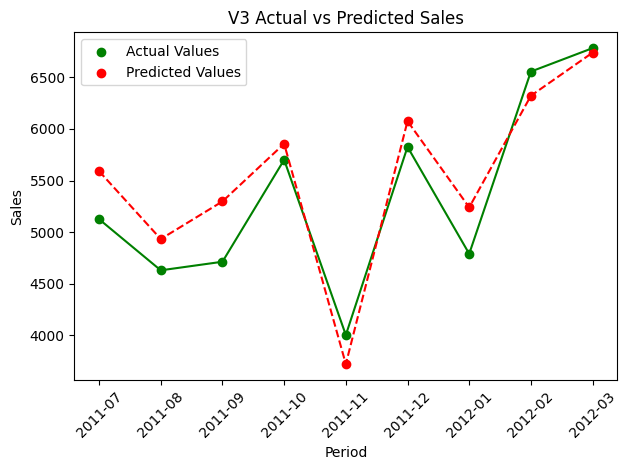

In [137]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V3 Actual vs Predicted Sales","Period", "Sales")

Brand Model Using Random Forest

In [138]:
# Splitting the dataset into X and Y for the brand model
x = sales_media_data.loc[:, ['Brand_Avg_Price_per_SU', 'brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G', 
                             'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_8', 'Month_10', 'Month_12']].values
y = sales_media_data.loc[:, 'Brand_Sales_Value'].values  

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)


Mean Squared Error = 6693956.87
Root Mean Squared Error = 2587.27
Mean Absolute Error = 2245.33
Mean Absolute Percentage Error = 5.84%
R Squared Value = 0.46
Adjusted R Squared Value = 0.30


Plotting graph for Actual vs Predicted Sales

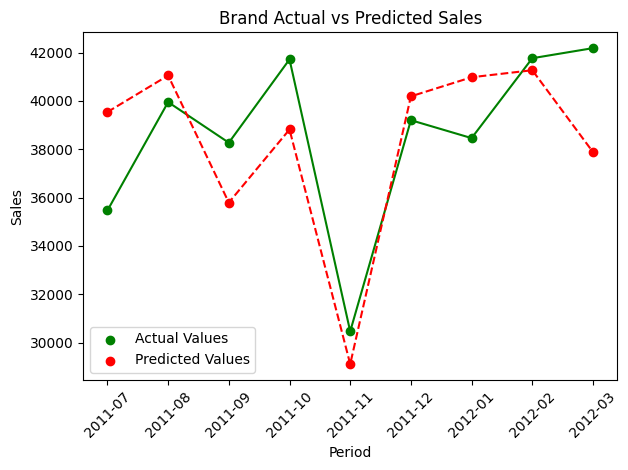

In [139]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "Brand Actual vs Predicted Sales","Period", "Sales")

V1 Model Using Random Forest

In [140]:
# Splitting the dataset into X and Y for the brand model
x = sales_media_data[['V1_Avg_Price_per_SU', 'V1_Media_Adstocked', 'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital', 
                      'Month_1', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11']]

y = sales_media_data[['V1_Sales_Value']].values

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators to control the number of trees

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)


Mean Squared Error = 2108443.49
Root Mean Squared Error = 1452.05
Mean Absolute Error = 1099.88
Mean Absolute Percentage Error = 13.09%
R Squared Value = 0.53
Adjusted R Squared Value = 0.39


C:\Users\jeeva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Plotting graph for Actual vs Predicted Sales

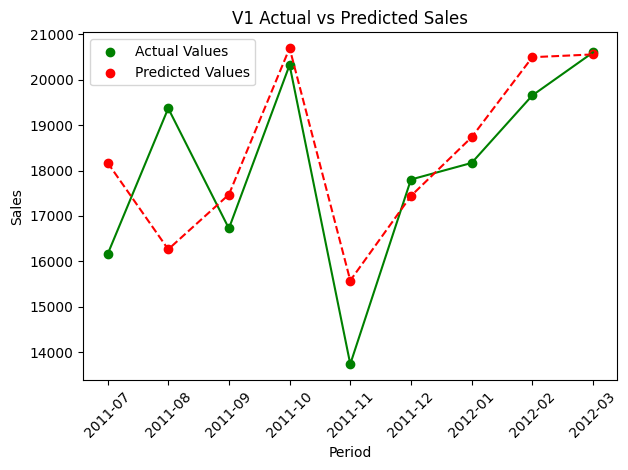

In [141]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V1 Actual vs Predicted Sales","Period", "Sales")

V2 Model Using Random Forest

In [142]:
# Splitting the dataset into X and Y for the brand model
x = sales_media_data[['V2_Avg_Price_per_SU', 'V2_WTD', 'v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR', 
                      'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'Month_1', 
                      'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_9']]

y = sales_media_data[['V2_Sales_Value']].values

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators to control the number of trees

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)


Mean Squared Error = 883380.07
Root Mean Squared Error = 939.88
Mean Absolute Error = 803.86
Mean Absolute Percentage Error = 6.88%
R Squared Value = 0.29
Adjusted R Squared Value = 0.05


C:\Users\jeeva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Plotting graph for Actual vs Predicted Sales

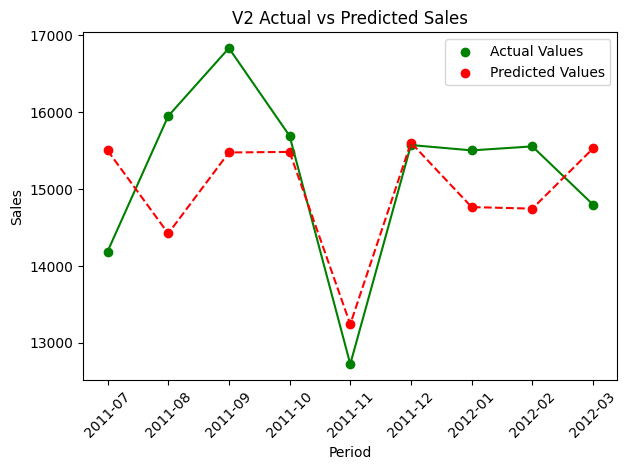

In [143]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V2 Actual vs Predicted Sales","Period", "Sales")

V3 Model Using Random Forest

In [144]:
# Splitting the dataset into X and Y for the brand model
x = sales_media_data[[
    'V3_Avg_Price_per_SU', 'V3_Shipment', 'v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR', 
    'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'V1_Media_Adstocked', 
    'Month_1', 'Month_11', 'Month_4', 'Month_6'
]]
y = sales_media_data[['V3_Sales_Value']].values

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators to control the number of trees

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)


Mean Squared Error = 133409.81
Root Mean Squared Error = 365.25
Mean Absolute Error = 275.17
Mean Absolute Percentage Error = 20.76%
R Squared Value = 0.83
Adjusted R Squared Value = 0.78


C:\Users\jeeva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Plotting graph for Actual vs Predicted Sales

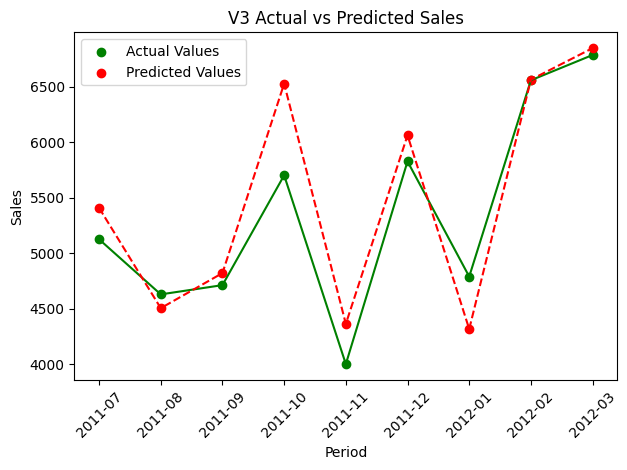

In [145]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V3 Actual vs Predicted Sales","Period", "Sales")

Brand Model Using XGBoost Regressor

In [146]:
# Splitting the dataset into X and Y for the brand model
x = sales_media_data.loc[:, ['Brand_Avg_Price_per_SU', 'brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G', 
                             'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_8', 'Month_10', 'Month_12']].values
y = sales_media_data.loc[:, 'Brand_Sales_Value'].values  

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# XGBoost model
model = XGBRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators and other hyperparameters

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)


Mean Squared Error = 9466217.47
Root Mean Squared Error = 3076.72
Mean Absolute Error = 2776.60
Mean Absolute Percentage Error = 7.07%
R Squared Value = 0.23
Adjusted R Squared Value = 0.01


Plotting graph for Actual vs Predicted Sales

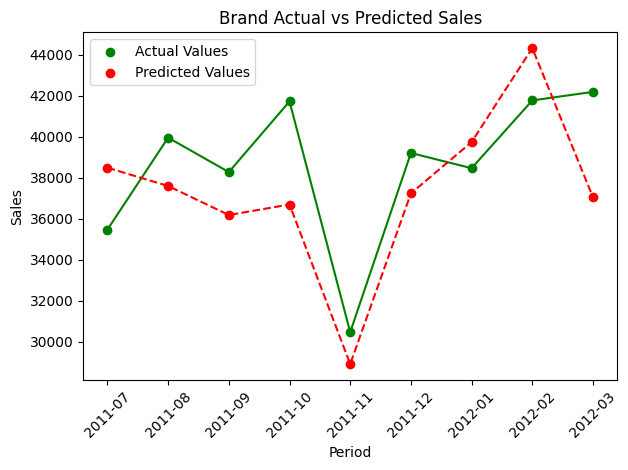

In [147]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "Brand Actual vs Predicted Sales","Period", "Sales")

V1 Model Using XGBoost Regressor

In [148]:
# Splitting the dataset into X and Y for the brand model
x = sales_media_data[['V1_Avg_Price_per_SU', 'V1_Media_Adstocked', 'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital', 
                      'Month_1', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11']]

y = sales_media_data[['V1_Sales_Value']].values

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# XGBoost Regressor model
model = XGBRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators and other parameters

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)


Mean Squared Error = 2939758.36
Root Mean Squared Error = 1714.57
Mean Absolute Error = 1271.06
Mean Absolute Percentage Error = 15.70%
R Squared Value = 0.34
Adjusted R Squared Value = 0.15


Plotting graph for Actual vs Predicted Sales

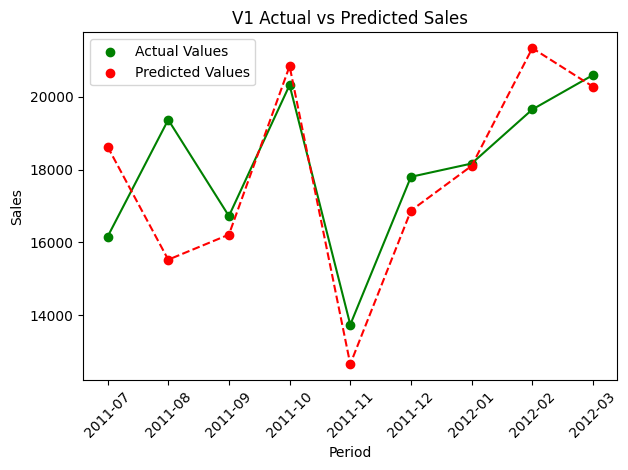

In [149]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V1 Actual vs Predicted Sales","Period", "Sales")

V2 Model Using XGBoost Regressor

In [150]:
# Splitting the dataset into X and Y for the brand model
x = sales_media_data[['V2_Avg_Price_per_SU', 'V2_WTD', 'v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR', 
                      'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'Month_1', 
                      'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_9']]

y = sales_media_data[['V2_Sales_Value']].values

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# XGBoost Regressor model
model = XGBRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators and other parameters

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)


Mean Squared Error = 747011.54
Root Mean Squared Error = 864.30
Mean Absolute Error = 795.15
Mean Absolute Percentage Error = 7.09%
R Squared Value = 0.40
Adjusted R Squared Value = 0.20


Plotting graph for Actual vs Predicted Sales

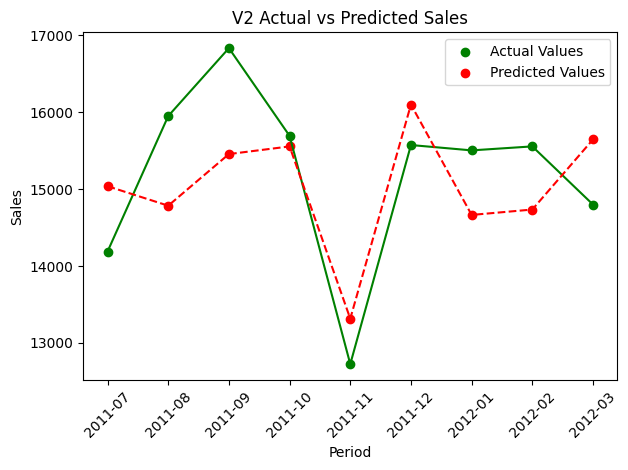

In [151]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V2 Actual vs Predicted Sales","Period", "Sales")

V3 Model Using XGBoost Regressor

In [152]:
# Splitting the dataset into X and Y for the brand model
x = sales_media_data[[
    'V3_Avg_Price_per_SU', 'V3_Shipment', 'v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR', 
    'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'V1_Media_Adstocked', 
    'Month_1', 'Month_11', 'Month_4', 'Month_6'
]]
y = sales_media_data[['V3_Sales_Value']].values

# Fix random seed for reproducibility
np.random.seed(42)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# XGBoost Regressor model
model = XGBRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)


Mean Squared Error = 202997.09
Root Mean Squared Error = 450.55
Mean Absolute Error = 403.55
Mean Absolute Percentage Error = 18.38%
R Squared Value = 0.74
Adjusted R Squared Value = 0.66


Plotting graph for Actual vs Predicted Sales

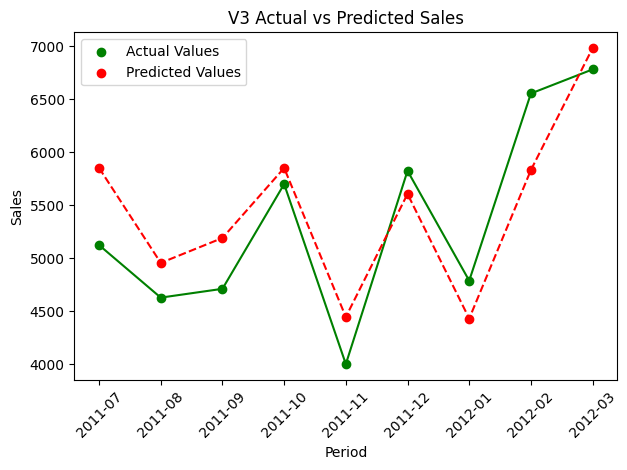

In [153]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V3 Actual vs Predicted Sales","Period", "Sales")

Accuracy comparison for all models.

In [154]:
# Define the models used for comparison
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest', 'XGBoost Model']

# Define R-squared, Adjusted R-squared, and MAPE values for the Brand Model
brand_r_squared = [0.92, 0.92, 0.92, 0.46, 0.23]  # R-squared values for Brand Model
brand_adjusted_r_squared = [0.89, 0.89, 0.89, 0.30, 0.01]  # Adjusted R-squared values for Brand Model
brand_mape = [2.21, 2.21, 2.10, 5.84, 7.07]  # MAPE values for Brand Model

# Create a DataFrame to store the results for the Brand Model
brand_results_df = pd.DataFrame({
    'Model': model_names,
    'R-squared': brand_r_squared,
    'Adjusted R-squared': brand_adjusted_r_squared,
    'MAPE': brand_mape
})

# Define R-squared, Adjusted R-squared, and MAPE values for the V1 Model
v1_r_squared = [0.85, 0.85, 0.85, 0.53, 0.34]  # R-squared values for V1 Model
v1_adjusted_r_squared = [0.81, 0.81, 0.81, 0.39, 0.15]  # Adjusted R-squared values for V1 Model
v1_mape = [3.55, 13.75, 3.60, 13.09, 15.70]  # MAPE values for V1 Model

# Create a DataFrame to store the results for the V1 Model
v1_results_df = pd.DataFrame({
    'Model': model_names,
    'R-squared': v1_r_squared,
    'Adjusted R-squared': v1_adjusted_r_squared,
    'MAPE': v1_mape
})

# Define R-squared, Adjusted R-squared, and MAPE values for the V2 Model
v2_r_squared = [0.91, 0.91, 0.90, 0.29, 0.40]  # R-squared values for V2 Model
v2_adjusted_r_squared = [0.88, 0.88, 0.86, 0.05, 0.20]  # Adjusted R-squared values for V2 Model
v2_mape = [1.79, 7.63, 1.77, 6.88, 7.09]  # MAPE values for V2 Model

# Create a DataFrame to store the results for the V2 Model
v2_results_df = pd.DataFrame({
    'Model': model_names,
    'R-squared': v2_r_squared,
    'Adjusted R-squared': v2_adjusted_r_squared,
    'MAPE': v2_mape
})

# Define R-squared, Adjusted R-squared, and MAPE values for the V3 Model
v3_r_squared = [0.85, 0.85, 0.85, 0.83, 0.74]  # R-squared values for V3 Model
v3_adjusted_r_squared = [0.81, 0.80, 0.80, 0.78, 0.66]  # Adjusted R-squared values for V3 Model
v3_mape = [6.14, 19.82, 6.19, 20.76, 18.38]  # MAPE values for V3 Model

# Create a DataFrame to store the results for the V3 Model
v3_results_df = pd.DataFrame({
    'Model': model_names,
    'R-squared': v3_r_squared,
    'Adjusted R-squared': v3_adjusted_r_squared,
    'MAPE': v3_mape
})

# Display the results for each model
print("Brand Model")
print(brand_results_df)  # Display the results for the Brand Model
print("\nV1 Model")
print(v1_results_df)  # Display the results for the V1 Model
print("\nV2 Model")
print(v2_results_df)  # Display the results for the V2 Model
print("\nV3 Model")
print(v3_results_df)  # Display the results for the V3 Model


Brand Model
               Model  R-squared  Adjusted R-squared  MAPE
0  Linear Regression       0.92                0.89  2.21
1   Lasso Regression       0.92                0.89  2.21
2   Ridge Regression       0.92                0.89  2.10
3      Random Forest       0.46                0.30  5.84
4      XGBoost Model       0.23                0.01  7.07

V1 Model
               Model  R-squared  Adjusted R-squared   MAPE
0  Linear Regression       0.85                0.81   3.55
1   Lasso Regression       0.85                0.81  13.75
2   Ridge Regression       0.85                0.81   3.60
3      Random Forest       0.53                0.39  13.09
4      XGBoost Model       0.34                0.15  15.70

V2 Model
               Model  R-squared  Adjusted R-squared  MAPE
0  Linear Regression       0.91                0.88  1.79
1   Lasso Regression       0.91                0.88  7.63
2   Ridge Regression       0.90                0.86  1.77
3      Random Forest       0.29   

Best Model For Brand is Linear Regression

R-Squared value is 0.92 and MAPE value is 2.21

In [155]:
# splitting the dataset in to x and y for brand MODEL 
x = sales_media_data.loc[:,['Brand_Avg_Price_per_SU', 'brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G', 'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_8', 'Month_10', 'Month_12']].values
y = sales_media_data.loc[:,'Brand_Sales_Value'].values  

# Fix random seed for reproducibility
np.random.seed(42)
# splitting data in to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# LinearRegression algorithm
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 1034125.58
Root Mean Squared Error = 1016.92
Mean Absolute Error = 850.28
Mean Absolute Percentage Error = 2.21%
R Squared Value = 0.92
Adjusted R Squared Value = 0.89


Plotting graph for Actual vs Predicted Sales

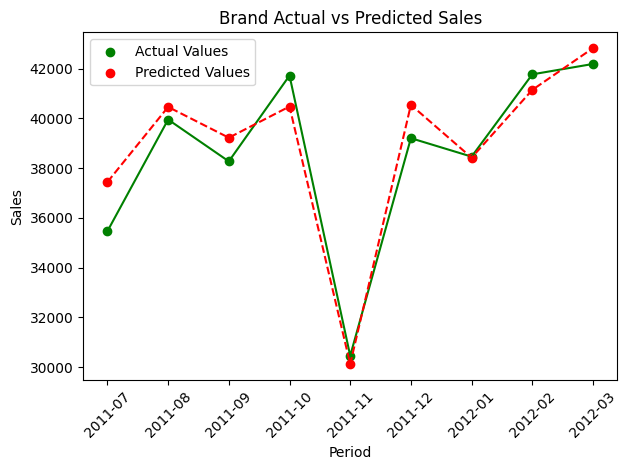

In [156]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "Brand Actual vs Predicted Sales","Period", "Sales")

Brand Model Contribution Chart

In [157]:
def plot_feature_contributions(data, features, target, feature_mapping, model=None, title="Feature Contribution Chart", color="mediumorchid"):
    """
    Plot a feature contribution chart based on a linear regression model.

    Parameters:
    - data (pd.DataFrame): Dataset containing features and target variable.
    - features (list): List of feature column names to include in the model.
    - target (str): Target column name.
    - feature_mapping (dict): Dictionary to map feature names to readable labels.
    - model: Pre-trained regression model (default: LinearRegression).
    - title (str): Title for the contribution chart.
    - color (str): Bar color for the chart.

    Returns:
    - None (Displays the chart).
    """
    # Extract input features (X) and target variable (y)
    X_features = data.loc[:, features]
    y_target = data.loc[:, target]

    # Use provided model or train a new Linear Regression model
    if model is None:
        model = LinearRegression()
        model.fit(X_features, y_target)

    # Map feature names for better readability
    renamed_features = [feature_mapping.get(col, col) for col in features]

    # Calculate contributions
    coefficients = np.abs(model.coef_.flatten())  # Flatten coefficients to 1D array
    average_values = X_features.mean().values  # Compute the mean of each feature
    multiplied_values = coefficients * average_values  # Multiply coefficients by averages

    # Compute total contribution and each feature's percentage
    total_contribution = np.sum(multiplied_values)
    feature_contributions = (multiplied_values * 100) / total_contribution

    # Create a DataFrame for contributions
    contribution_data = pd.DataFrame({
        'Feature': renamed_features,
        'Contribution': feature_contributions
    }).sort_values(by='Contribution', ascending=False)

    # Plot the feature contribution chart
    plt.figure(figsize=(12, 6))

    # Define the bars
    bars = plt.bar(contribution_data['Feature'], contribution_data['Contribution'], color=color)

    # Add labels and title to the plot
    plt.xlabel('Feature Columns', fontsize=12)
    plt.ylabel('Contribution (%)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

    # Annotate bars with contribution percentages
    for bar, contribution in zip(bars, contribution_data['Contribution']):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Center text horizontally
            bar.get_height() + 0.5,             # Position above the bar
            f'{contribution:.1f}%',             # Show contribution percentage
            ha='center',                        # Align text horizontally
            va='bottom',                        # Align text vertically
            fontsize=9                          # Font size
        )

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


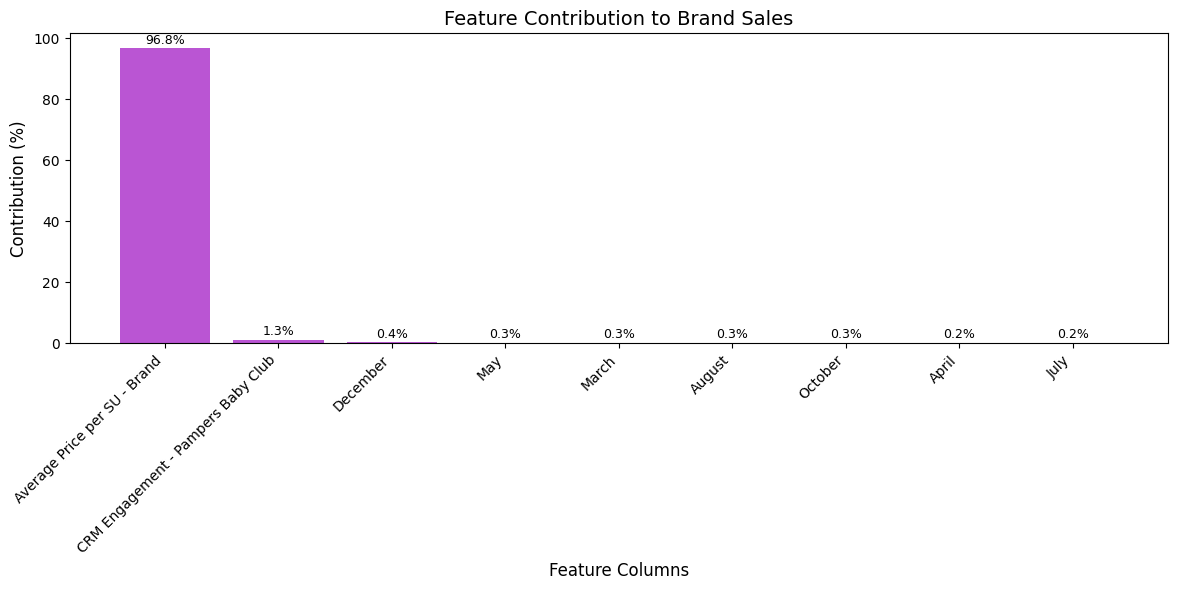

In [158]:
feature_mapping = {
    'Brand_Avg_Price_per_SU': 'Average Price per SU - Brand',
    'brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G': 'CRM Engagement - Pampers Baby Club',
    'Month_3': 'March',
    'Month_4': 'April',
    'Month_5': 'May',
    'Month_7': 'July',
    'Month_8': 'August',
    'Month_10': 'October',
    'Month_12': 'December'
}

plot_feature_contributions(
    data=sales_media_data,
    features=[
        'Brand_Avg_Price_per_SU', 
        'brand_CRM_Pampers_Baby_Club_Pls_add_all_CRM_Elements_P&G', 
        'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_8', 'Month_10', 'Month_12'
    ],
    target='Brand_Sales_Value',
    feature_mapping=feature_mapping,
    title="Feature Contribution to Brand Sales",
    color="mediumorchid"
)


Best Model For V1 is Linear Regression 

R-Squared value is 0.85 and MAPE value is 3.55

In [159]:
x = sales_media_data[['V1_Avg_Price_per_SU', 'V1_Media_Adstocked', 'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital', 'Month_1', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11']]

y = sales_media_data[['V1_Sales_Value']]

# Fix random seed for reproducibility
np.random.seed(42)
# splitting data in to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# LinearRegression algorithm
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 652543.02
Root Mean Squared Error = 807.80
Mean Absolute Error = 622.96
Mean Absolute Percentage Error = 3.55%
R Squared Value = 0.85
Adjusted R Squared Value = 0.81


Plotting graph for Actual vs Predicted Sales

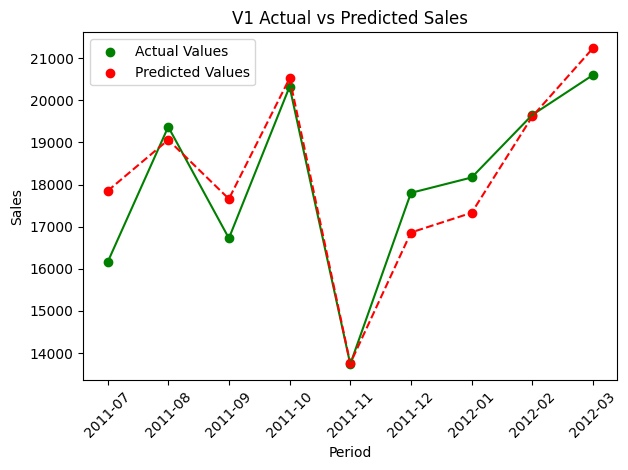

In [160]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V1 Actual vs Predicted Sales","Period", "Sales")

Contribution Chart for V1 Model

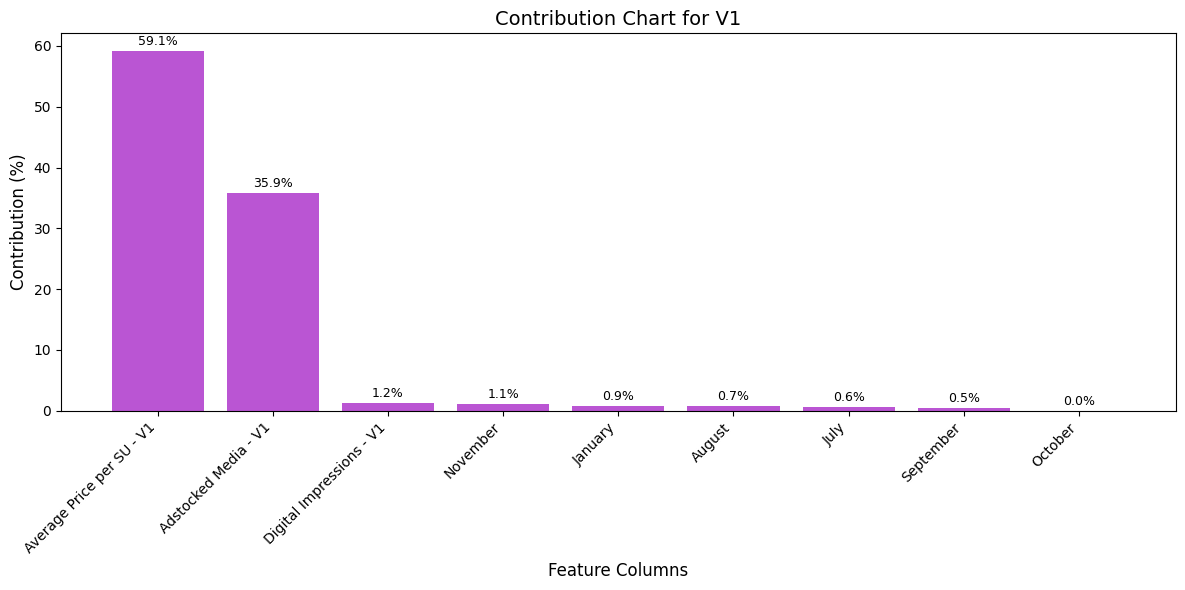

In [161]:
feature_mapping = {
    'V1_Avg_Price_per_SU': 'Average Price per SU - V1',
    'V1_Media_Adstocked': 'Adstocked Media - V1',
    'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital': 'Digital Impressions - V1',
    'Month_1': 'January',
    'Month_7': 'July',
    'Month_8': 'August',
    'Month_9': 'September',
    'Month_10': 'October',
    'Month_11': 'November'
}

plot_feature_contributions(
    data=sales_media_data,
    features=[
        'V1_Avg_Price_per_SU', 
        'V1_Media_Adstocked', 
        'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_Clicks_Digital', 
        'Month_1', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11'],
    target='V1_Sales_Value',
    feature_mapping=feature_mapping,
    title="Contribution Chart for V1",
    color="mediumorchid"
)


Best Model For V2 is Linear Regression

R-Squared value is 0.91 and MAPE value is 1.79

In [162]:
x = sales_media_data[['V2_Avg_Price_per_SU', 'V2_WTD', 'v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR', 'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'Month_1', 'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_9']]

y = sales_media_data[['V2_Sales_Value']]

# Fix random seed for reproducibility
np.random.seed(42)
# splitting data in to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# LinearRegression algorithm
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 111496.29
Root Mean Squared Error = 333.91
Mean Absolute Error = 275.90
Mean Absolute Percentage Error = 1.79%
R Squared Value = 0.91
Adjusted R Squared Value = 0.88


Plotting graph for Actual vs Predicted Sales

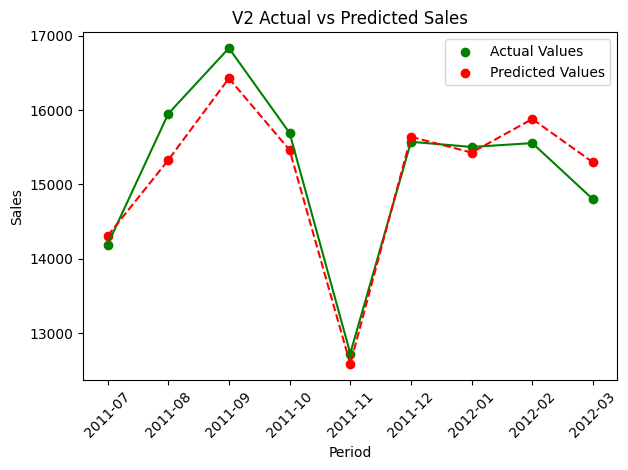

In [163]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V2 Actual vs Predicted Sales","Period", "Sales")

Contribution Chart for V2 Model

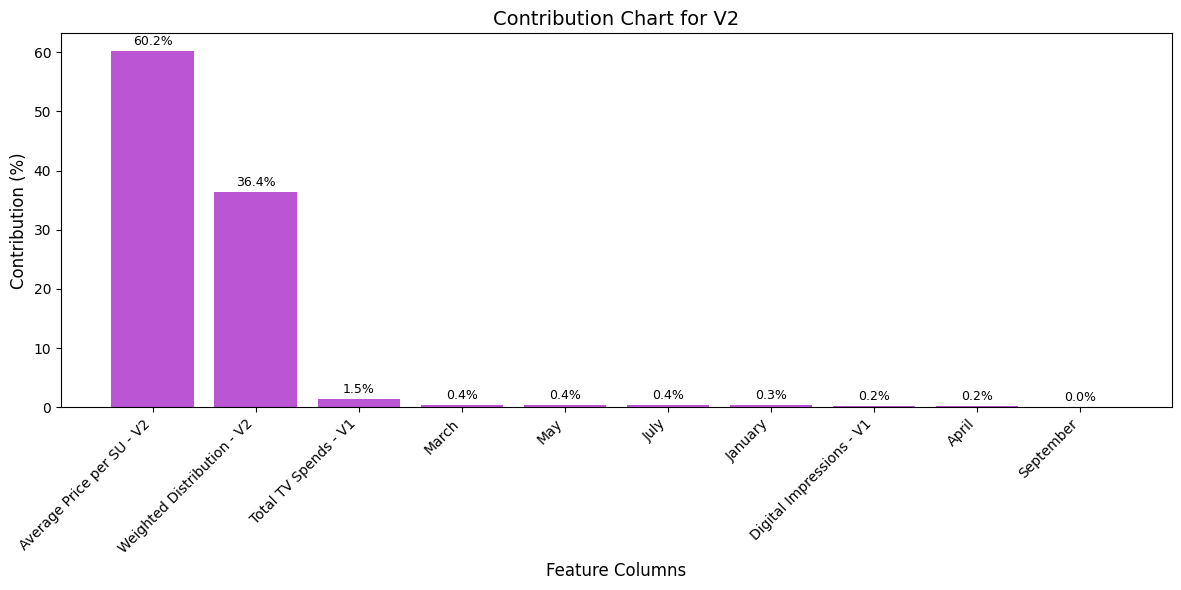

In [164]:
feature_mapping = {
    'V2_Avg_Price_per_SU': 'Average Price per SU - V2',
    'V2_WTD': 'Weighted Distribution - V2',
    'v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR': 'Total TV Spends - V1',
    'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital': 'Digital Impressions - V1',
    'Month_1': 'January',
    'Month_3': 'March',
    'Month_4': 'April',
    'Month_5': 'May',
    'Month_7': 'July',
    'Month_9': 'September'
}


plot_feature_contributions(
    data=sales_media_data,
    features=[
        'V2_Avg_Price_per_SU', 
        'V2_WTD', 'v1_TV_Spends_TOTAL_Spends_ISP_TV_USM_AOR', 
        'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 
        'Month_1', 'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_9'],
    target='V2_Sales_Value',
    feature_mapping=feature_mapping,
    title="Contribution Chart for V2",
    color="mediumorchid"
)


Best Model For V3 is Linear Regression

R-Squared value is 0.85 and MAPE value is 6.14

In [165]:
x = sales_media_data[[
     'V3_Avg_Price_per_SU', 'V3_Shipment', 'v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR', 
    'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'V1_Media_Adstocked', 'Month_1','Month_11', 'Month_4','Month_1',  'Month_6'
]]
y = sales_media_data[['V3_Sales_Value']]

# Fix random seed for reproducibility
np.random.seed(42)
# splitting data in to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# LinearRegression algorithm
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)

# Accuracy Metrics
accuracyMeasures(y_test, y_pred, x)

Mean Squared Error = 116939.92
Root Mean Squared Error = 341.96
Mean Absolute Error = 305.68
Mean Absolute Percentage Error = 6.14%
R Squared Value = 0.85
Adjusted R Squared Value = 0.80


Plotting graph for Actual vs Predicted Sales

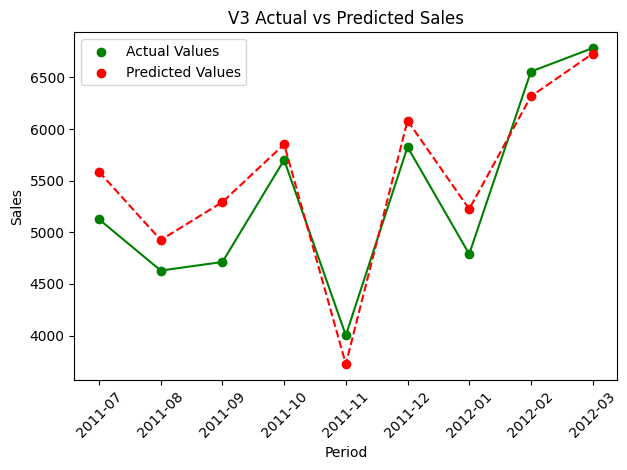

In [166]:
plot_month_year_graph(y_test, y_pred, sales_media_data, "V3 Actual vs Predicted Sales","Period", "Sales")

Contribution Chart for V2 Model

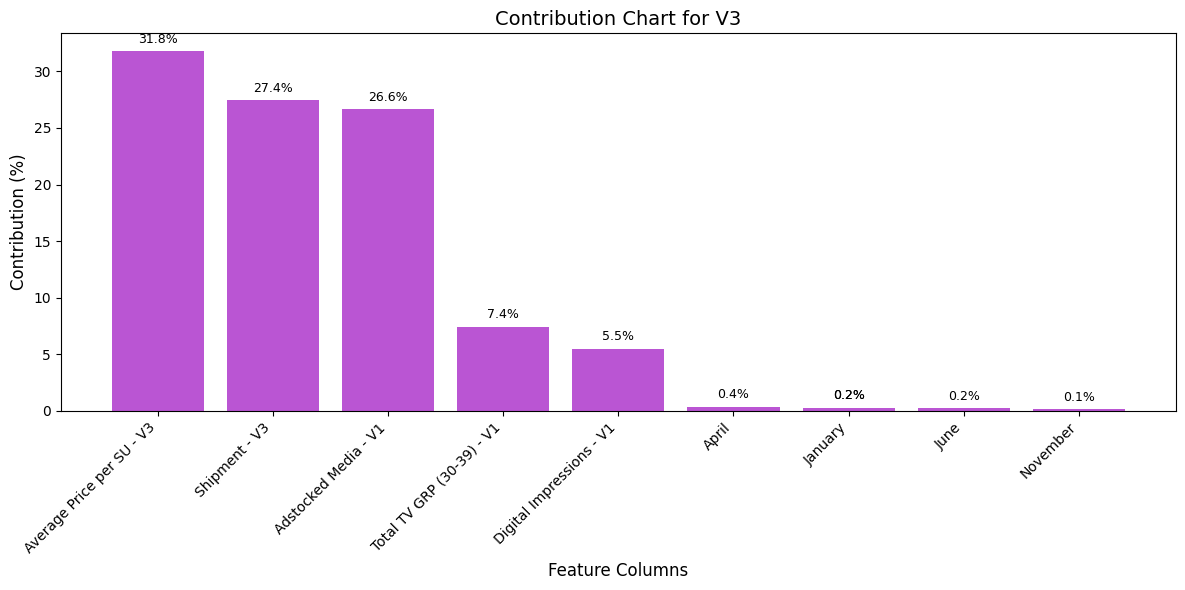

In [167]:
feature_mapping = {
    'V3_Avg_Price_per_SU': 'Average Price per SU - V3',
    'V3_Shipment': 'Shipment - V3',
    'v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR': 'Total TV GRP (30-39) - V1',
    'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital': 'Digital Impressions - V1',
    'V1_Media_Adstocked': 'Adstocked Media - V1',
    'Month_1': 'January',
    'Month_4': 'April',
    'Month_6': 'June',
    'Month_11': 'November'
}

plot_feature_contributions(
    data=sales_media_data,
    features=[
       'V3_Avg_Price_per_SU', 'V3_Shipment', 'v1_TV_GRP_F30_39_TOTAL_GRP_ISP_TV_GRP_AOR', 
    'v1_iMedia_TOTAL_Impression_Click_iMedia_No_of_impressions_Digital', 'V1_Media_Adstocked',
        'Month_1','Month_11', 'Month_4','Month_1',  'Month_6'],
    target='V3_Sales_Value',
    feature_mapping=feature_mapping,
    title="Contribution Chart for V3",
    color="mediumorchid"
)
